# Investigation of Methane Activation over NiO/CZ using in-situ FTIR Spectroscopy

# Introduction

Vibration of molecules, specially organics, adsorbs energy at infra-red (IR) levels, which makes FTIR spectroscopy a powerful tool for detection and identification of different molecules. The characteristic peaks detected by FTIR spectroscopy depend on the chemical bond and the vibrational mode. Provided with a large enough library of spectra of chemicals, FTIR spectroscopy alone should be sufficient for identification and quantification the composition of the sample tested through linear combination fitting. However, in the field of surface chemistry, due the volatility and the overlapping nature of characteristics peaks of surface species (as they are highly dependent on the surface of adsorption and could form complex features in the IR band), it is already not as trivial for the identification of surface species without a thorough understanding of the adsoprtion surface and the surface species; let alone the quantification of different surface species. To address the challenge, our team: [Yimeng Lyu and Dr. Carsten Sievers Group from Georgia Tech](https://sievers.chbe.gatech.edu/), developed the following novel algorithm in the aim of the identifying and deconvoluting the contribution of different surface species over time in a series of time resolved IR spectra from methane activation over NiO/CZ catalysts. 


## The Algorithm

Here, we present a series of time-resolved IR spectra from methane activaiton over the 2wt% NiO/CZ catalyst. The goal is to develop a new algorithm that is capable of routinely 1) identifying all the surface species and 2) quantifying the evolution of different surface species over time. 


### Identification of Surface Species
As mentioned previously, each surface species produces one or more unique characteristic peaks in the IR spectrum. Hence, the first logical step for identification of all surface species is to find all the peaks among all spectra at different times. [Keles et. al.](https://pubs.rsc.org/en/Content/ArticleLanding/AN/2014/C3AN01879B#!divAbstract) demonstrated non-linear curve fitting routines to fit series of IR spectra, where they used local maxima in the 1st  IR spectrum of each time series as indicators for existing peaks. While the approach is mathematically sound, it often fails to capture small peaks that are adjacent to larger peaks. Additionally, it works poorly when the signal-to-noise ratio of the spectra are non-ideal. 

To address these disadvantages, we propose to analyze the difference between spectra at adjacent times, i.e. the 'derivative of the series of data with time', using non-linear regression fitting. The analysis of the difference between spectra better reveals peaks that arises at later times, specially if they were shadowed by the largers that rises earlier. Non-linear regression fitting optimizes the difference between the model and the data set, which handles data sets with low signal-to-noise ratio.

Even though we know already that some of the peaks are correlated as they may belong to the same surface species, because the goal here is to find all the possible peaks, such limitations are ignored temperarily. In this step, a vector basis that contains all possible peaks is established and optimized. The variables fitted include the peak positions ($\mu$), peak variances ($\sigma$) and peak amplitudes (a) of each peak in the vector basis. The number of peaks and peak type of each peak are fixed, or the required input variables. As the analysis applies to a series of time-resolved data set, it is reasonable to assume that the peak shape, defined by the peak position ($\mu$) and peak variance ($\sigma$) should be constant over time, or at least over a certain period of time, as changes in the peak position or variance is an indication of changes in the chemical properties of the surface species. 

Finally, the loss function optimized using non-linear regression fitting is: 

$Loss_{IG}(\vec{a},\vec{\mu},\vec{\sigma}) = \sum_i \bigg(y_i - \sum_j a_{ij} F(\mu_{j},\sigma_{j}) -b \bigg)$

, where $\vec{y}$ is the vector that contains spectra at different times, 

$\vec{a}$ are the peak amplitudes for each peak at different times, 

$\vec{\mu}$ are the peak positions, 

and $\vec{\sigma}$ are the peak variances; 

b is a constant that accounts for the intercept of the fit; 

the index i refers to the number of spectra at different times, 

and the index j refers to the number of peaks in the vector basis. 

The peak positions and variances are fixed over time. Only the amplitudes are changing with time, and they represent the relative quantity of different species at different times. The $F$ refers to the peak type, which could be either a Gaussian or a Voigt peak. 


### Construction of Vector Basis for All Surface Species

Now that all the possible peaks over all times have been identified, the next step is to find the chemical assignment to each peak. Basically, peaks that arises from different vibrational modes of the same species should be grouped together, as their relative ampltitude should be consistent at different times. Such assignment can be assisted by 1) examining the correlation matrix, 2) looking up peak assignments in the literature, and 3) referring to the reference experiments carried out by dosing probe molecules over the same surface. 


### Evolution of Surface Species by Non-Linear Regression Fitting 

The previous two steps established some basic understanding on the surface species and their charateristic peaks, i.e. how many surface species are their and how many peaks each species has. The final step is to reveal the evolution of surface species over time. Again, we start from the mathematical description of the problem. 

Assuming there are $n$ surface species, each consists of one or more peaks, representing different vibrational modes in the region of interest. To describe such a surface species mathematically, we have: 

$S_j = \sum_k\alpha_{jk} F(\mu_j,\sigma_j)$

, where j is the index of different surface species, 

and k is the index of peaks from each species. 

$\alpha_{jk}$ is the amplitute of each independent peak, 

and $F$ is the peak type which is either a Gaussian, or Voigt peak; 

and the shape of peak is defined by the peak position $\mu$, and peak variance $\sigma$. 

The key difference from the establishment in step 1 is that the ratios between the amplitudes of each peaks in the vector space is now fixed over time. This is basically the mathematical expression defining these peaks are from the same species. 

We can construct a 'vector basis', where all possible species are included. 

$X = \{S_0, S_1, S_2, ...\}$

If we knew the hyperparameters that define vectors for each species, the model becomes linear, i.e.:

$\vec{y} = \vec{\omega}\vec{X} + b$

, where $\vec{\omega}$ is the amplitude of each species, which again is a representation of the relative quantity of the species at different times. 

However, we want to optimize $\vec{\omega}$ together with the hyperparameters, which turns the problem non-linear. Hence, we define the loss function to optimize as: 

$Loss((\alpha, \mu, \sigma), \omega) = \sum_i (\vec{y_i} - \vec{y_{model,i}})^2$

, where $\vec{y_{model}}$ is defined as: 

$y_{model,i} = \sum_j\omega_{ij}\sum_k\alpha_{jk} F(\mu_j,\sigma_j)+b$

# Import Packages and Pre-Defined Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, report_fit, Minimizer
import time
from sklearn.metrics import r2_score
from ipynb.fs.full.functions import get_first_nbr_from_str, baseline_als, Data_import

In [2]:
from ipynb.fs.full.functions import Voigt, Gaussian
from ipynb.fs.full.functions import Generate_data, Generate_params, loss_func, Plot_data, Plot_com_data, Print_var
from ipynb.fs.full.functions import Generate_Vec_IG, Generate_data_IG, loss_func_IG, Generate_params_IG, Plot_data_IG

In [3]:
import seaborn as sns

# Import Data
Fist we import data from '20200918.xlsx', which contains IR spectra from methane activation over 2wt% NiO/CZ catalysts at 200 $^{\circ}$C. The experiment is carried out by flowing methane over a catalyst wafer in a operando IR cell at 200 $^{\circ}$C. The gaseous methane signal overlaps with features from activation. Hence, such signals are removed by subtraction of the gaseous methane spectrum collected at 200 $^{\circ}$C. Two plots were made from the data set: the 'accumulation' plot refers to the IR spectrum at different times from methane activation after subtraction of the gaseous methane signal; while the 'difference' plot refers to the difference between spectra in the accumulation plot at adjacent times. 

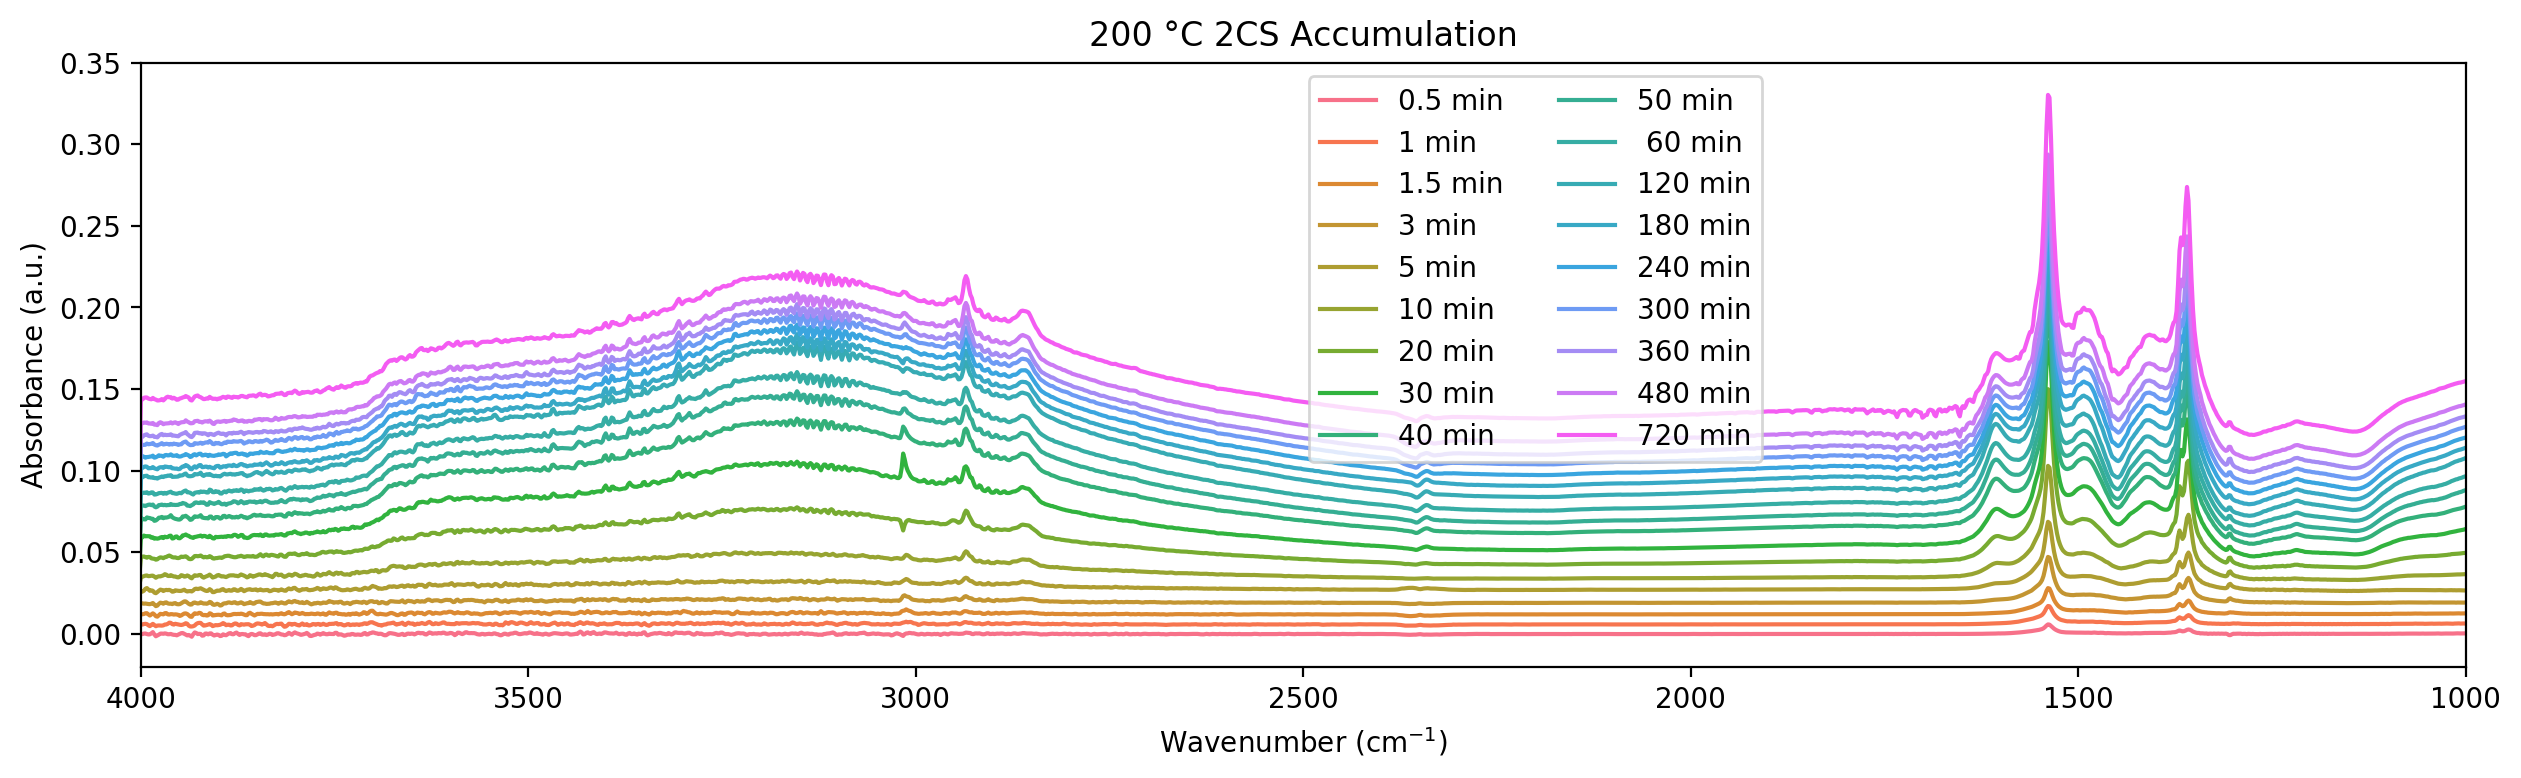

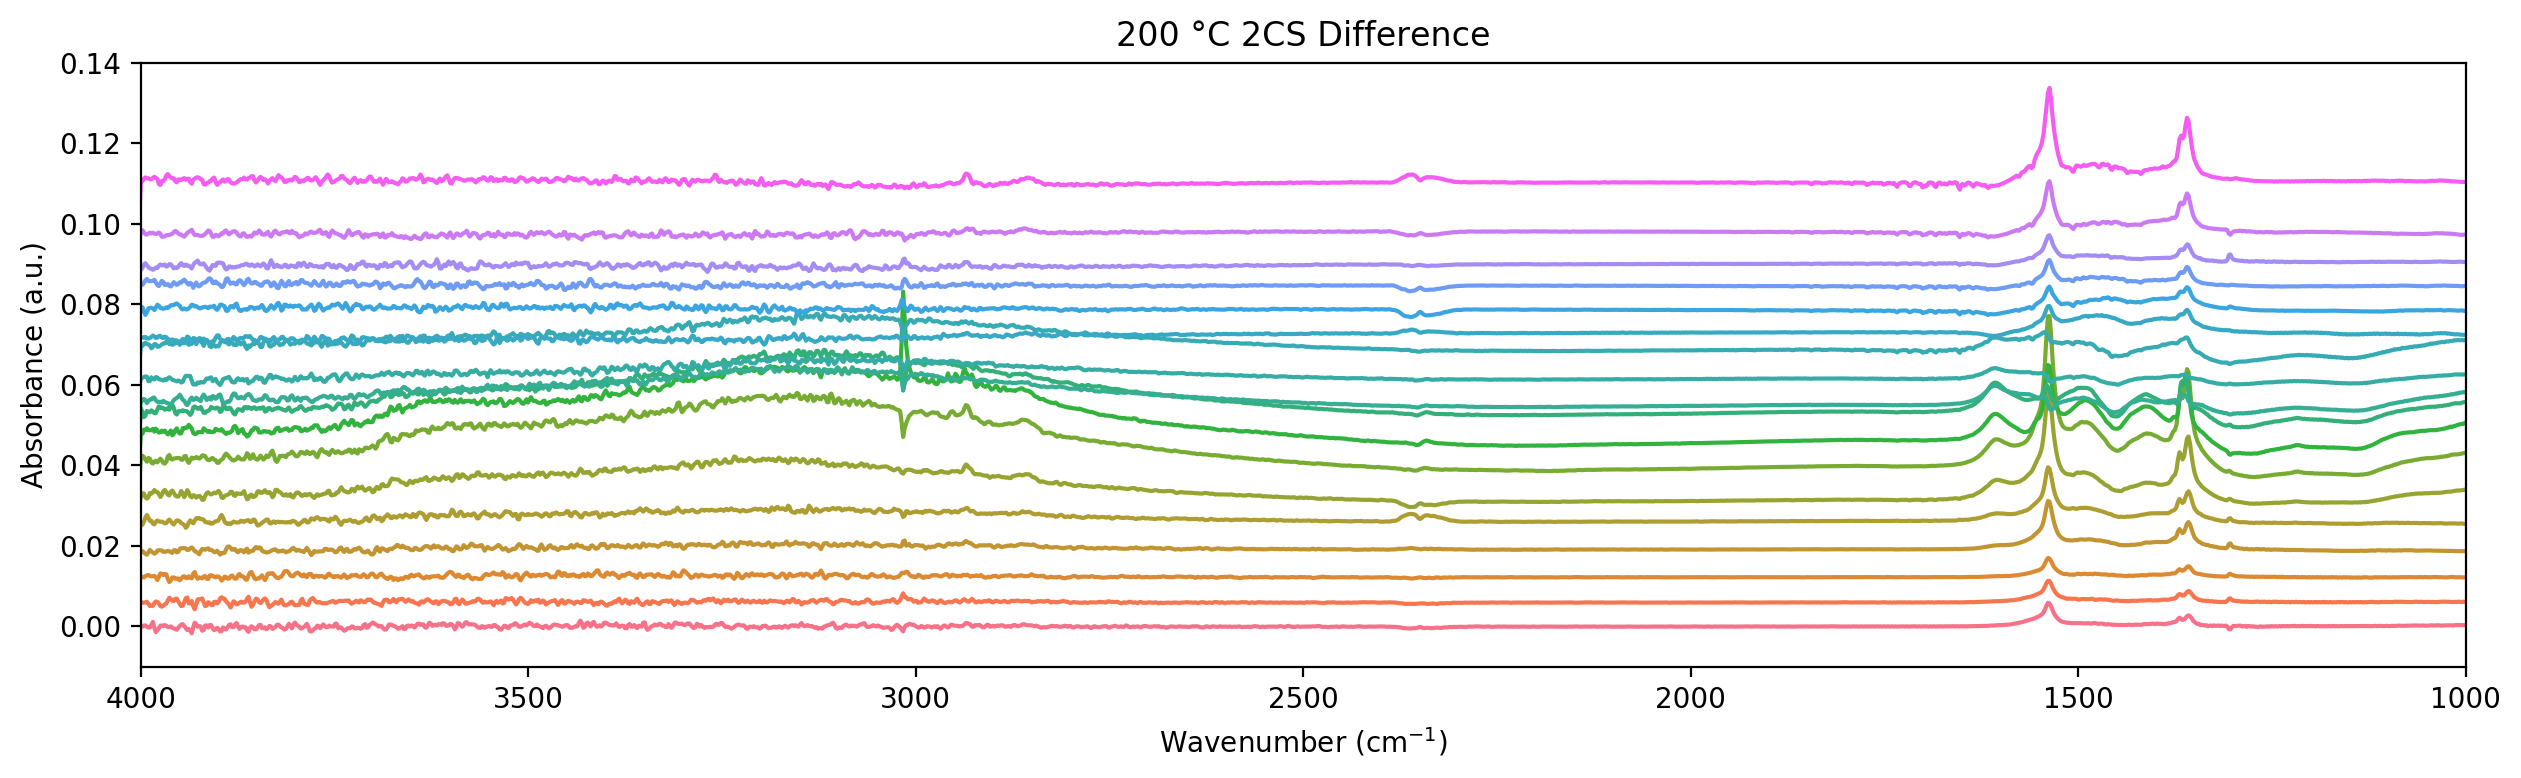

In [4]:
result = Data_import('data/20200918.xlsx', 200, '2CS', 1)
df = result['Data']
dif = result['Dif']
acu = result['Acu']
Time = result['Time']

## Process Data by Region

Feautures from methane activation locate in several regions in the IR band. Features in the 2800-3000 cm$^{-1}$ region are from the characteristic peaks of the C-H stretching from surface species. More complex features in the 1300 - 1700 cm$^{-1}$ region are from surface species like formates, carbonates, aromatics, and carbonyl form aldehydes. Features in the 1000 - 1300 cm$^{-1}$ are from alkoxy or alcohols. However, these features are relatively weak. Hence, this region is processed separately through background correction for better reveal of the features. 


The fitted region started at 2819.463 cm-1, and ended at 2971.814 cm-1.


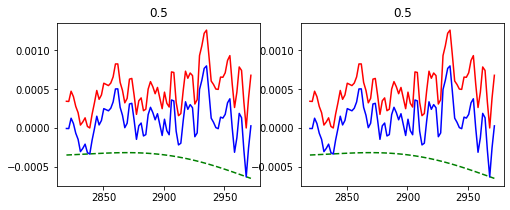

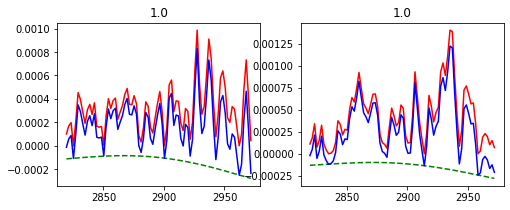

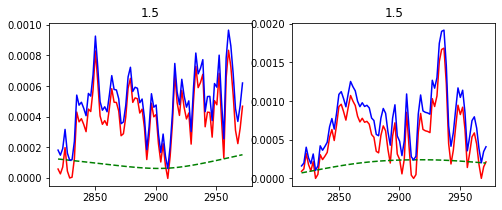

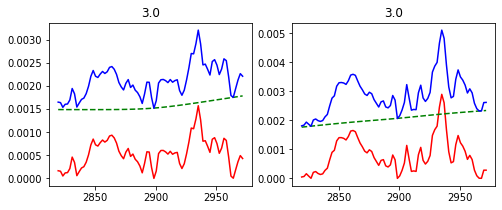

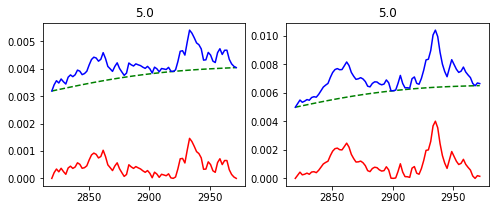

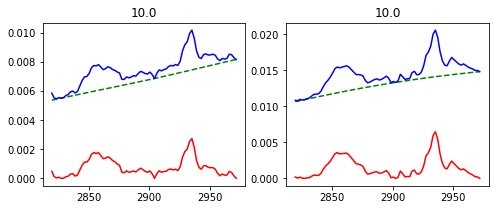

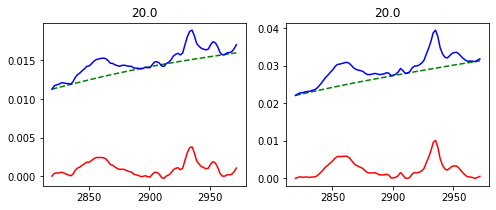

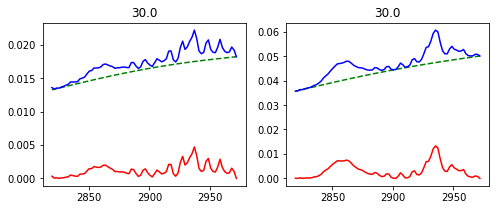

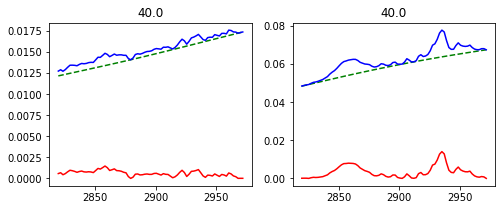

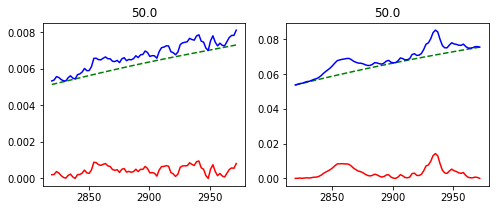

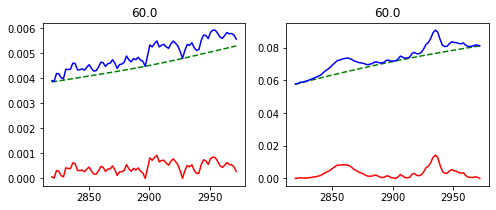

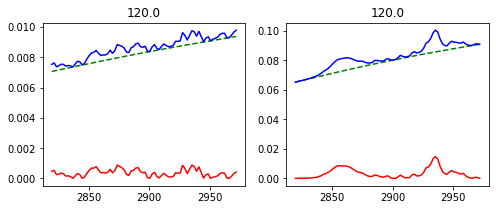

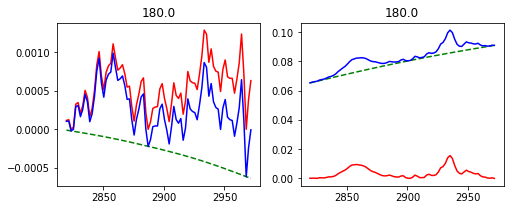

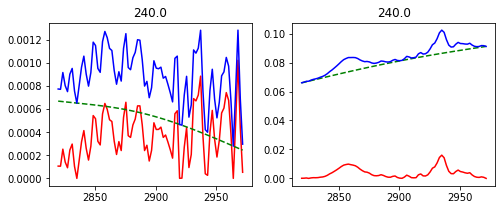

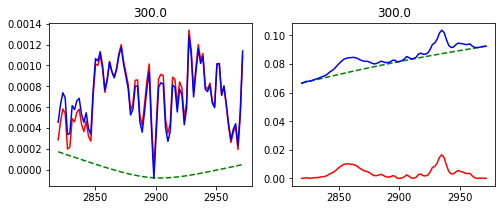

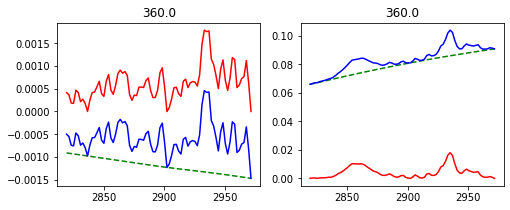

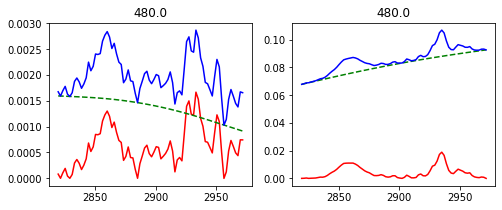

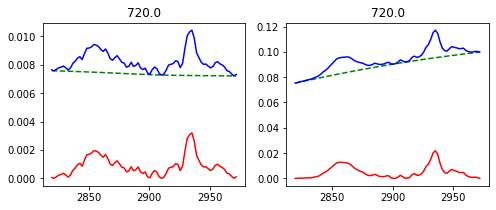

In [5]:
SCH = 1255     #start index of CH 
ECH = 1335     #end index of CH
a = np.transpose(acu[[dif.columns[0]]][SCH:ECH].to_numpy())
WN = a[0]
CH_acu = []
CH_dif = []
column_num = len(df.columns)-1
for i in range(1,column_num):
    a = np.transpose(dif[[dif.columns[i]]][SCH:ECH].to_numpy())
    a = a[0]
    ##baseline correction
    bsl = baseline_als(a, 105, 0.0001)
    y = a - bsl
    a_acu = np.transpose(acu[[dif.columns[i]]][SCH:ECH].to_numpy())[0]
    bsl_acu = baseline_als(a_acu, 105, 0.0001)
    y_acu = a_acu-bsl_acu
    CH_dif.append(y)
    CH_acu.append(y_acu)
    fig,ax = plt.subplots(1,2,figsize=(8,3))
    ax[0].plot(WN,y,'r')
    ax[0].plot(WN,bsl,'g--')
    ax[0].plot(WN,a,'b')
    ax[0].set_title(Time[i-1])
    ax[1].plot(WN,y_acu,'r')
    ax[1].plot(WN,bsl_acu,'g--')
    ax[1].plot(WN,a_acu,'b')
    ax[1].set_title(Time[i-1]) 
print('The fitted region started at {0} cm-1, and ended at {1} cm-1.'.format(WN[0], WN[-1]))
x_CH = np.array(WN)
y_CH = np.array(CH_acu)

In [6]:
S = 455
E = 675
b = np.transpose(dif[[dif.columns[0]]][S:E].to_numpy())
WN = b[0]
CC = []
CC_acu = []
Time = []
for i in range(1,column_num):
    a = np.transpose(dif[[dif.columns[i]]][S:E].to_numpy())
    b = np.transpose(acu[[dif.columns[i]]][S:E].to_numpy())
    CC.append(a[0])
    CC_acu.append(b[0])
    Time.append(get_first_nbr_from_str(dif.columns[i]))
x_CC = np.array(WN)
y_CC = np.array(CC)
Time = np.array(Time)
print('The fitted region started at {0} cm-1, and ended at {1} cm-1.'.format(WN[0], WN[-1]))

The fitted region started at 1276.665 cm-1, and ended at 1699.006 cm-1.


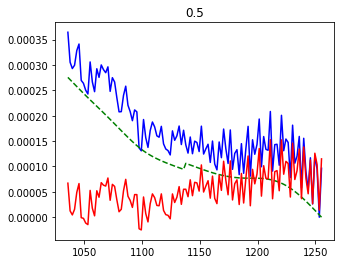

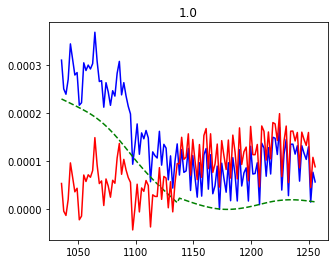

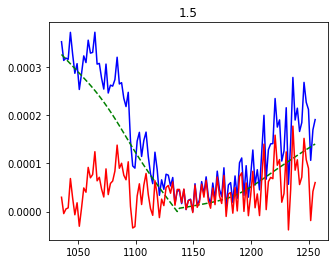

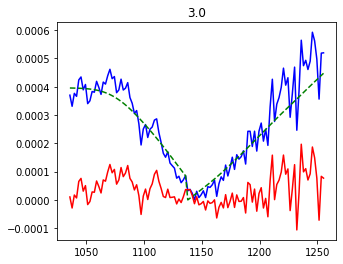

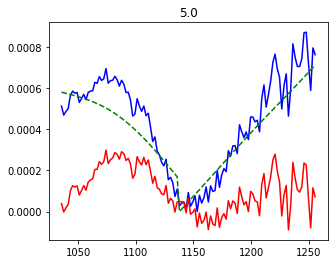

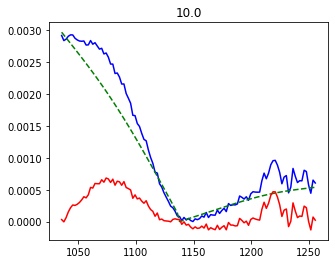

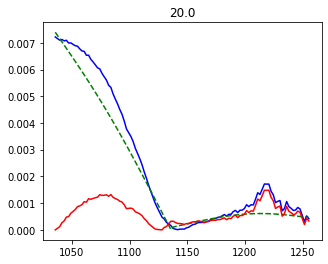

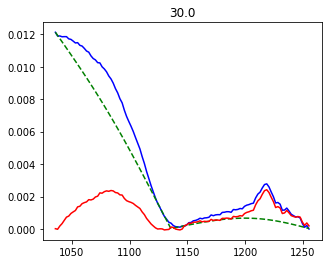

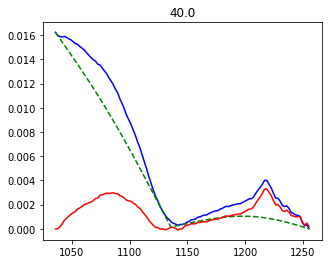

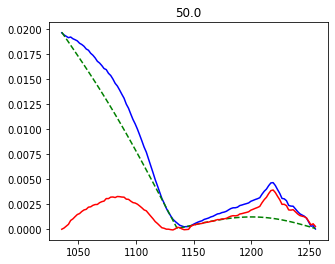

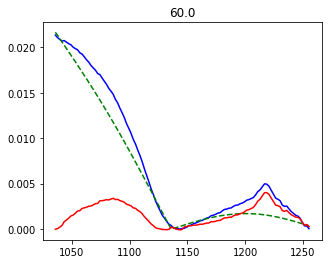

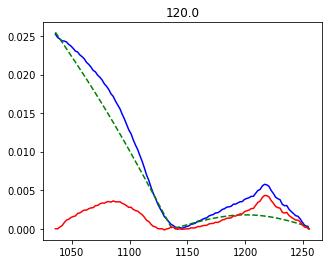

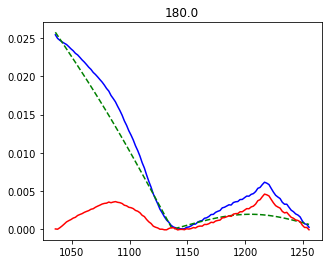

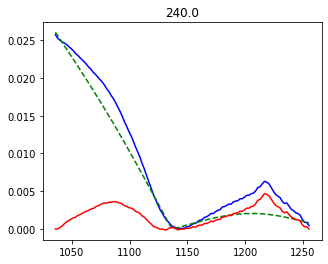

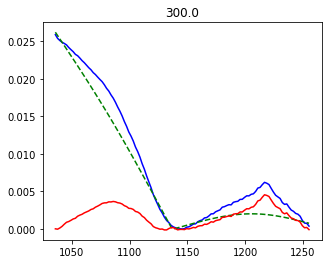

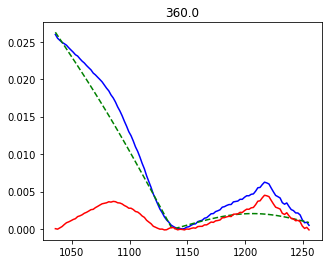

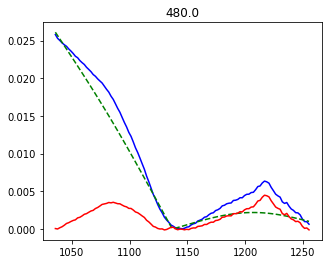

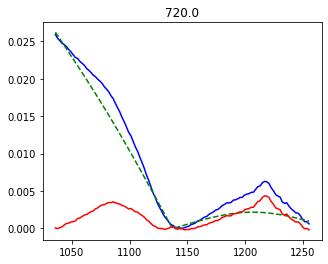

In [7]:
SCO = 330
ECO = 445
LCO = ECO-SCO
b = np.transpose(dif[[dif.columns[0]]][SCO:ECO].to_numpy())
WN = b[0]
CO = []
Min_ind = 53
for i in range(1,column_num):
    a = np.transpose(acu[[dif.columns[i]]][SCO:ECO].to_numpy())
    a1 = a[0][:Min_ind]
    a2 = a[0][Min_ind:]
    if i < 5:
        bsl1 = baseline_als(a1, 1005, 0.05)
        bsl2 = baseline_als(a2, 1005, 0.05)
    else: 
        bsl1 = baseline_als(a1, 105, 0.0005)
        bsl2 = baseline_als(a2, 105, 0.0005)
    y1 = a1 - bsl1
    y2 = a2 - bsl2
    DIF = y1[-1] - y2[0]
    y2 = y2 + DIF
    y = np.concatenate((y1,y2))
    bsl = np.concatenate((bsl1,bsl2))
    if i >= 8:
        bsl3 = baseline_als( y[48:58],5,0.5)
        y[48:58] = y[48:58] - bsl3
    CO.append(y)
    fig = plt.figure(figsize=(5,4))
    plt.plot(WN,a[0]-a[0].min(),'b-')
    plt.plot(WN,bsl-bsl.min(),'g--')
    plt.plot(WN,CO[-1],'r-')
    plt.title(Time[i-1])

x_CO = np.array(WN)
y_CO = np.array(CO)

# Data Analysis using the Algorithm
## Fitting the C-H Stretching
According to the algorithm, the first step is to establish a vector basis that contains all the possible peaks over all time. To capture all the possible peaks in the region, the difference spectra were analyzed, where no distinct peaks arose at later times. Hence, the accumulation spectra were used for the peak fittings for a better confidence in the fitted parameters. A rough analysis of the spectra, there should be 4 peaks in this region. An initial guess of the peak parameters is provided below.

## Finding a Good Initial Guess

By implementing the lmfit package, we can optimize of our loss function by minimizing the least square of the difference between the model and actual data. The 'leastsq' method from the lmfit package uses the 'Levenberg-Marquardt' algorithm for the minization. While often criticized, including the fact it finds
a local minima, this approach has some distinct advantages. These include being fast, and well-behaved for most
curve-fitting needs, and making it easy to estimate uncertainties for and correlations between pairs of fit variables. Still the disadvantage of the 'Levenberg-Marquardt' algorithm which is its looking for local minima should be addressed. Hence, the first step in our modeling methodology is finding a reasonable initial guess so that further optimization would have better performances. 

In [8]:
## Vec_IG contains the initial guess of the peaks 
## 'Mus' contains the peak positions
## 'Sigmas' contains the peak variances
## 'Types' contains the peak type of each peak
## 'Lims' contains any restrictions (e.g. upper/lower limit of the peak position/variance) applied to the peak

Vec_IG = {'Mus':np.array([2861.9,2952,2853.1,2934.2]),
          'Sigmas':np.array([6.7,3.6,4.1,2.9]),
          'Types':np.array([1,1,1,1]),
          'Lims':None}

The 'Generate_params_IG' function takes the dictionary 'Vec_IG' we just created and returns a set of parameters in the format of 'Parameters' defined by lmfit package. 

Then, we call the Minimizer function from lmfit package and optimize these parameters through minimizing the loss function. Other than the parameter set, the loss function also takes the wavenumbers: $x$ and IR data: $y$ together with the dictionary 'Vec_IG' as inputs. 

In [9]:
t0 = time.time()
fit_params_IG = Generate_params_IG(x_CH,Vec_IG,ndata =18)

fitter = Minimizer(loss_func_IG, fit_params_IG, fcn_args=(x_CH, y_CH, Vec_IG))
result = fitter.minimize(method='leastsq')
t1 = time.time()

print('The time cost is:',t1-t0)

The time cost is: 9.419125080108643


The optimized parameters are stored in result.params. Function Plot_data_IG uses the optimized parameters to create plots for further analysis. 

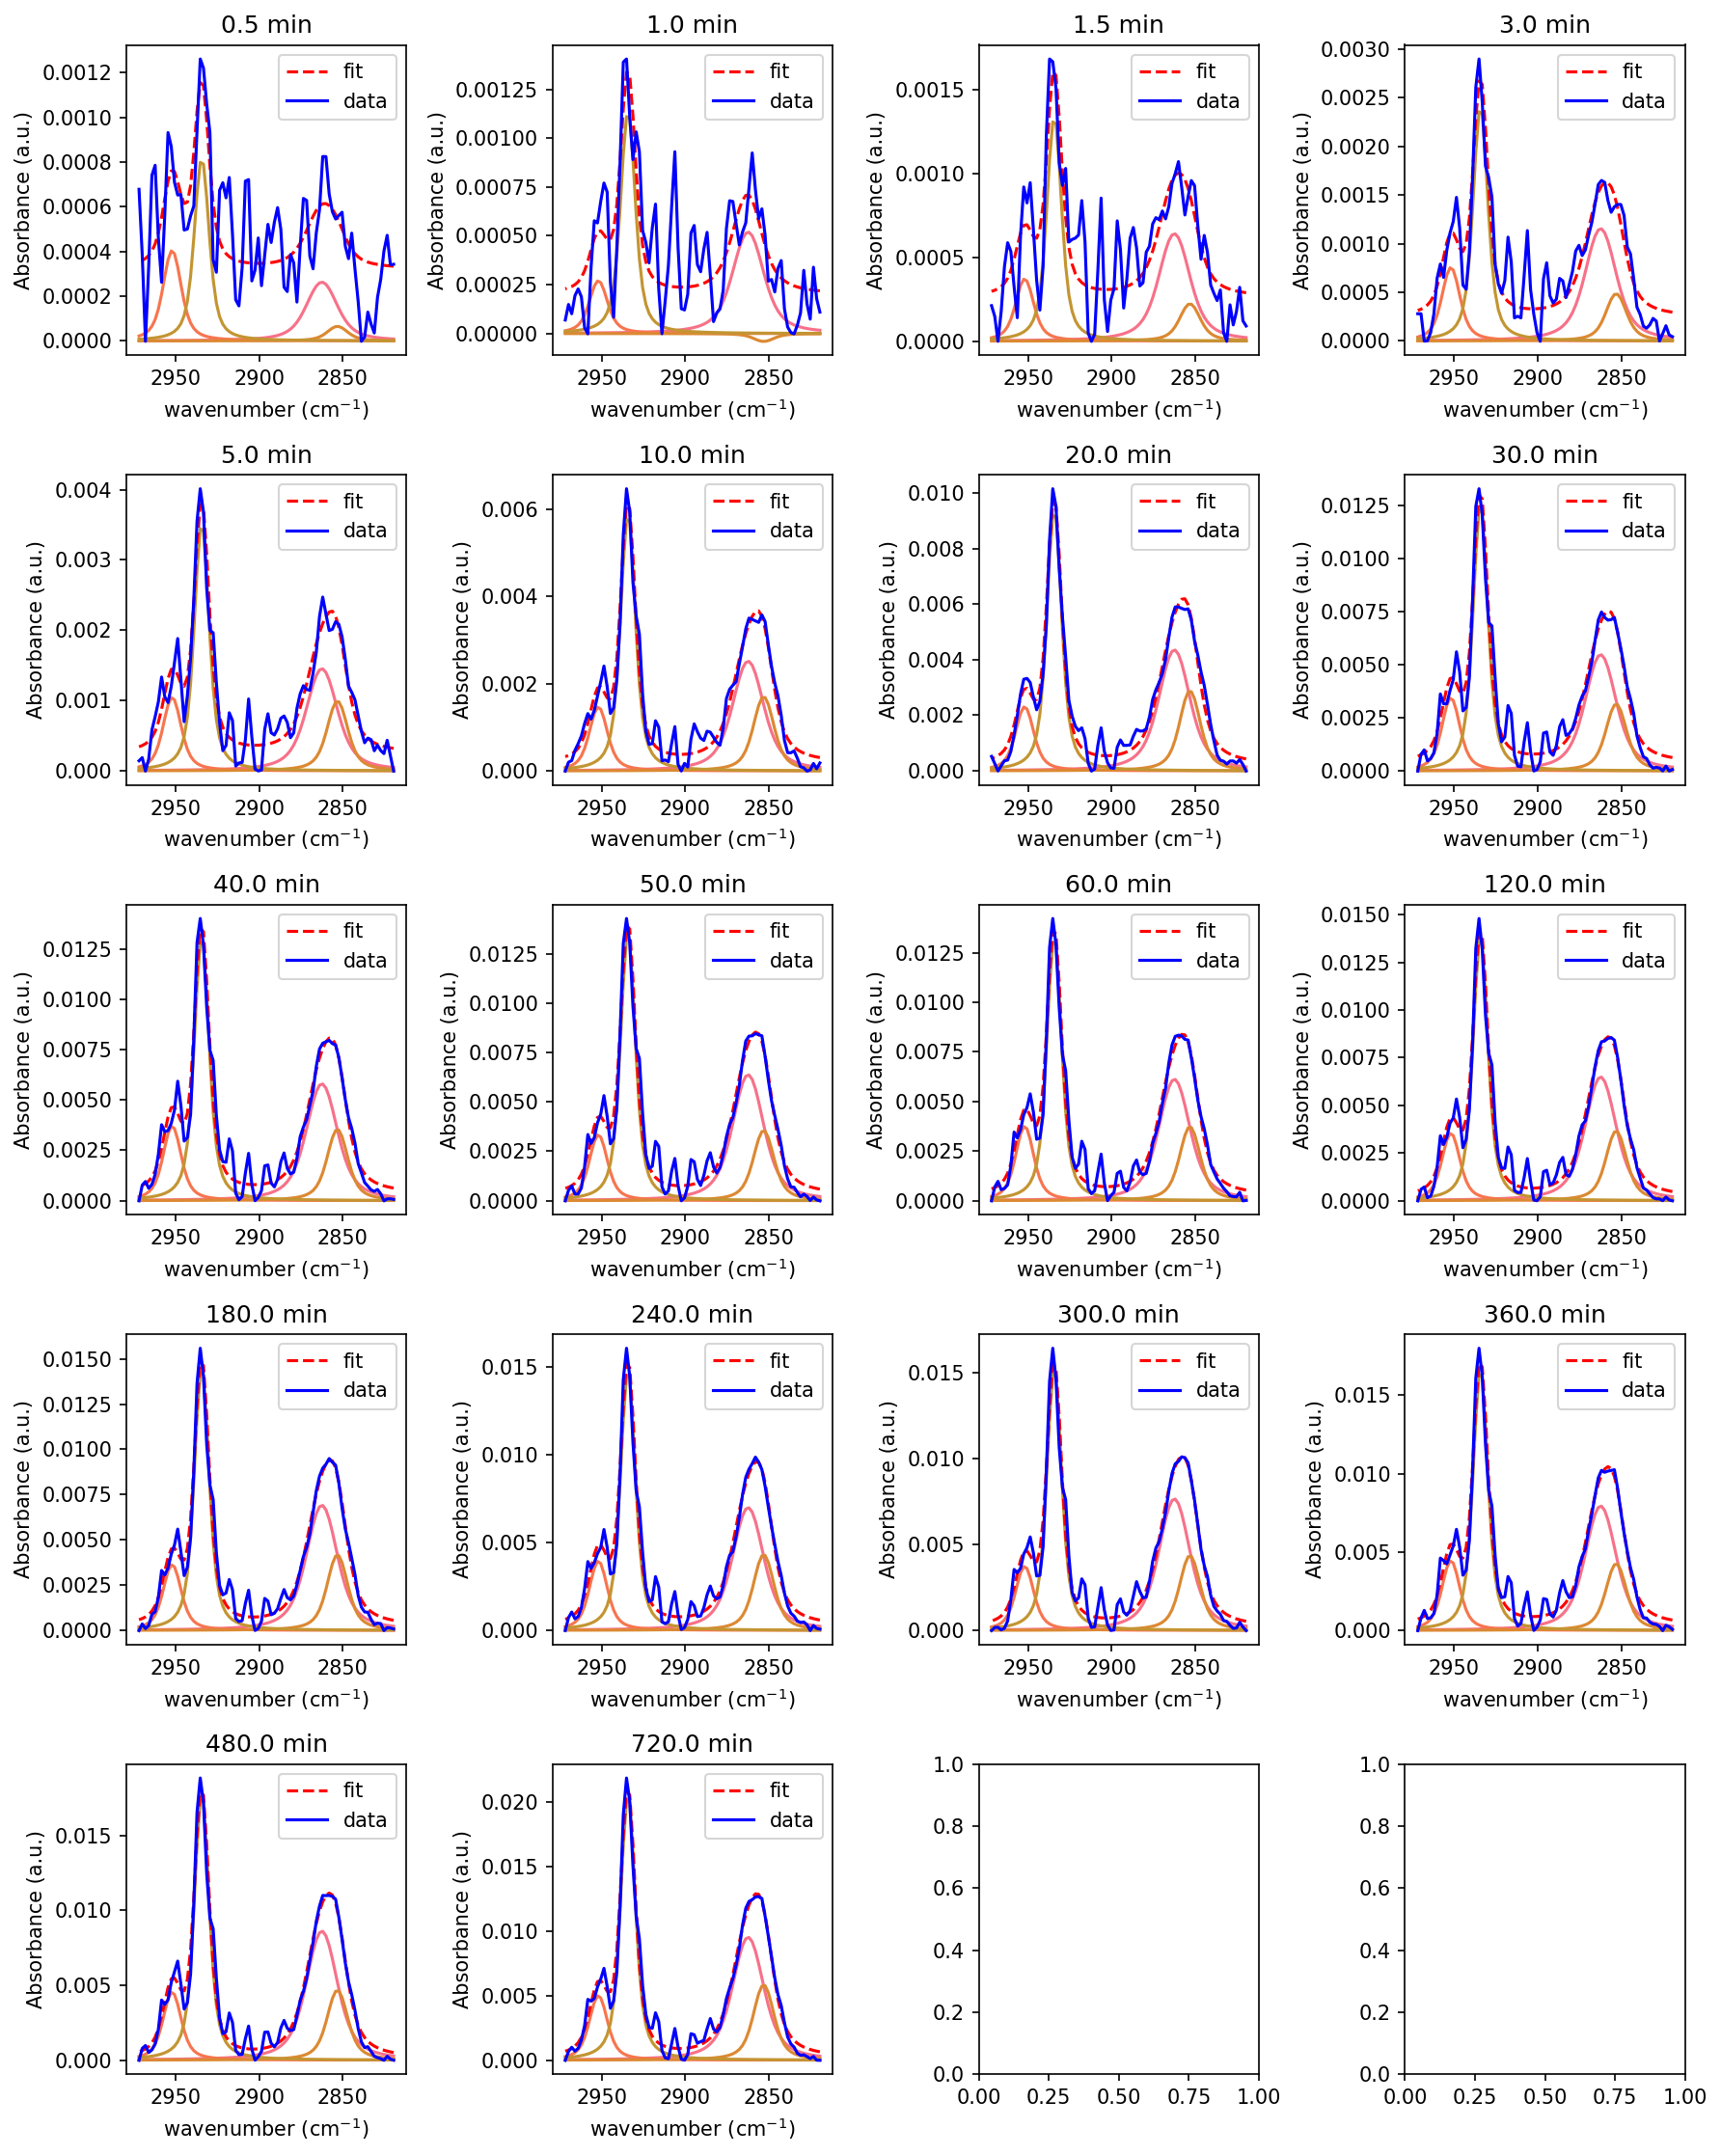

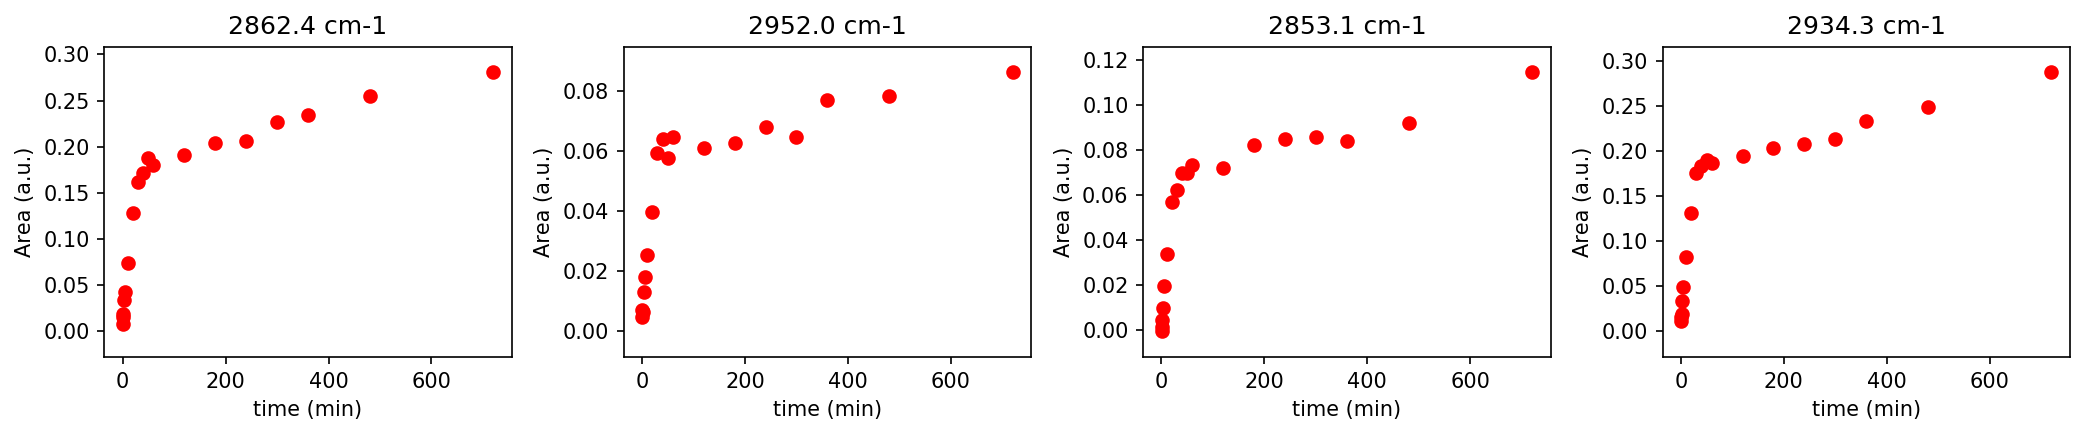

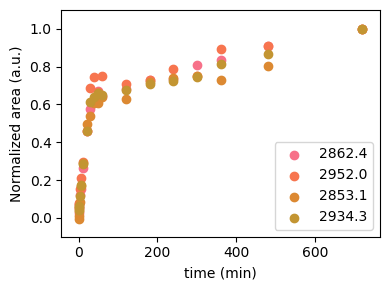

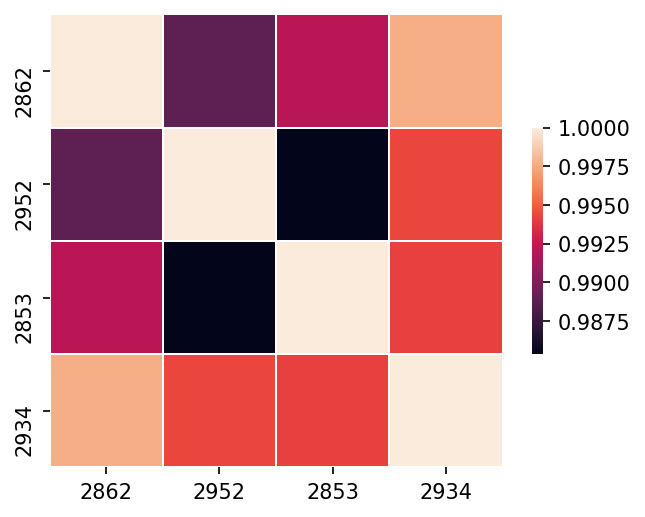

{'Peak Pos': [2862, 2952, 2853, 2934],
 'Amps': array([[ 0.00775737,  0.00697775,  0.0012756 ,  0.01141289],
        [ 0.015328  ,  0.00466578, -0.00078923,  0.01586059],
        [ 0.01892948,  0.00640824,  0.00437196,  0.01870168],
        [ 0.0340589 ,  0.01303097,  0.00953354,  0.03364407],
        [ 0.04287599,  0.01805352,  0.01949773,  0.04919296],
        [ 0.07422565,  0.02529625,  0.03341299,  0.08245115],
        [ 0.1284174 ,  0.03980298,  0.05654158,  0.1314366 ],
        [ 0.16140447,  0.05930027,  0.0618486 ,  0.17534281],
        [ 0.17135664,  0.06401982,  0.06956907,  0.18353114],
        [ 0.18802035,  0.05756606,  0.06976977,  0.19017727],
        [ 0.18050641,  0.064718  ,  0.07316367,  0.18609105],
        [ 0.19143853,  0.06105221,  0.07180186,  0.19408563],
        [ 0.20406152,  0.06276451,  0.08193843,  0.20332547],
        [ 0.20596364,  0.06797315,  0.08455163,  0.20721736],
        [ 0.22632204,  0.0645928 ,  0.0857307 ,  0.21353057],
        [ 0.2343774 ,  

In [10]:
params_IG = result.params
Plot_data_IG(params_IG,x_CH,y_CH,Vec_IG,Time,False)

With all possible peaks are identified, the next step is to establish a vector basis that categorizes peaks to different surface species. From the correlation matrix, the four peaks in this regions are highly correlated (lowest correlation is still above 0.98), indicating that they are either from the same species or from different species that share really similar kinetics. Either way, these 4 peaks are categorized into the same vector. 

The Vec_IG_struc dictionary contains the structure of the vector basis. The 'Generate_Vec_IG function takes in the structure of vector basis and the parameters from the previous and generate a dictionary 'Vec_Fit' that combines the two information, where such dictionary is fed to the 'Generate_params' function to generation of a set parameters for the optimization.

In [11]:
Vec_IG_struc = {'Peaks':[[0,1,2,3]], #Index of peaks that are from the same species
                'Types':[[1,1,1,1]]} #Peak type of each peak in this vector

Vec_fit = Generate_Vec_IG(params_IG,Vec_IG_struc,18)
Vec_fit['Vec0']['Lims'] = {'Peaks':np.array([0,1,2,3]),
                           'Specs':np.array([[0.1,0.1,0.1,0.1],
                                            [4000,4000,4000,4000],
                                            [0.1,.1,0.1,0.1],
                                            [6.5,6.5,6.5,6.5],
                                            [-1,-1,-1,-1]]),
                           'Pos': None}

Now, the structure of vector basis is settled with all peaks categorized into different surface species (represented by a vector), we, again, use the Minimizer function from lmfit package (where the authors of lmfit adapted from Scipy.optimize) to optimize the parameters in our vector basis. 

In [12]:
t0 = time.time()
fit_params = Generate_params(x_CH,Vec_fit,ndata = 18)

fitter = Minimizer(loss_func, fit_params, fcn_args=(x_CH, y_CH, Vec_fit))
result = fitter.minimize(method='leastsq')
t1 = time.time()

print('The time cost is:',t1-t0)

0 6.158791152365902 0.1 6.5
0 2862.4197695290663 2832.4197695290663 2892.4197695290663
0 3.6 0.1 6.5
0 2952.0 2922.0 2982.0
0 4.1 0.1 6.5
0 2853.1 2823.1 2883.1
0 2.9188491530152327 0.1 6.5
0 2934.3059431042852 2904.3059431042852 2964.3059431042852
The time cost is: 8.665049076080322


We use the R$^{2}$ score as the metric for error estimation. 

In [13]:
new_params = result.params
yhat_CH = Generate_data(new_params,x_CH,Vec_fit,ndata=18)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CH.flatten(), yhat_CH.flatten())))

The R2 score of the fit is: 0.97


Plotting.....


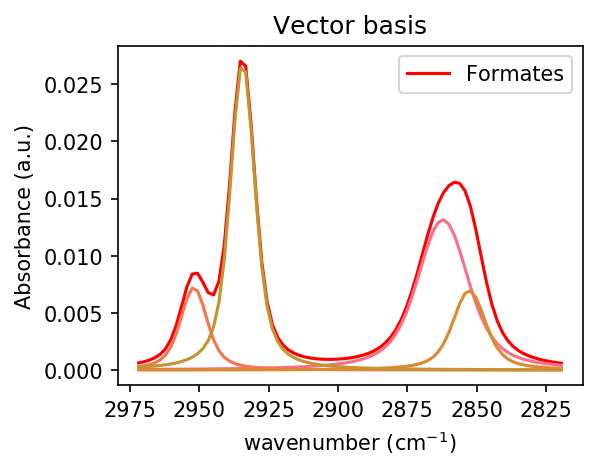

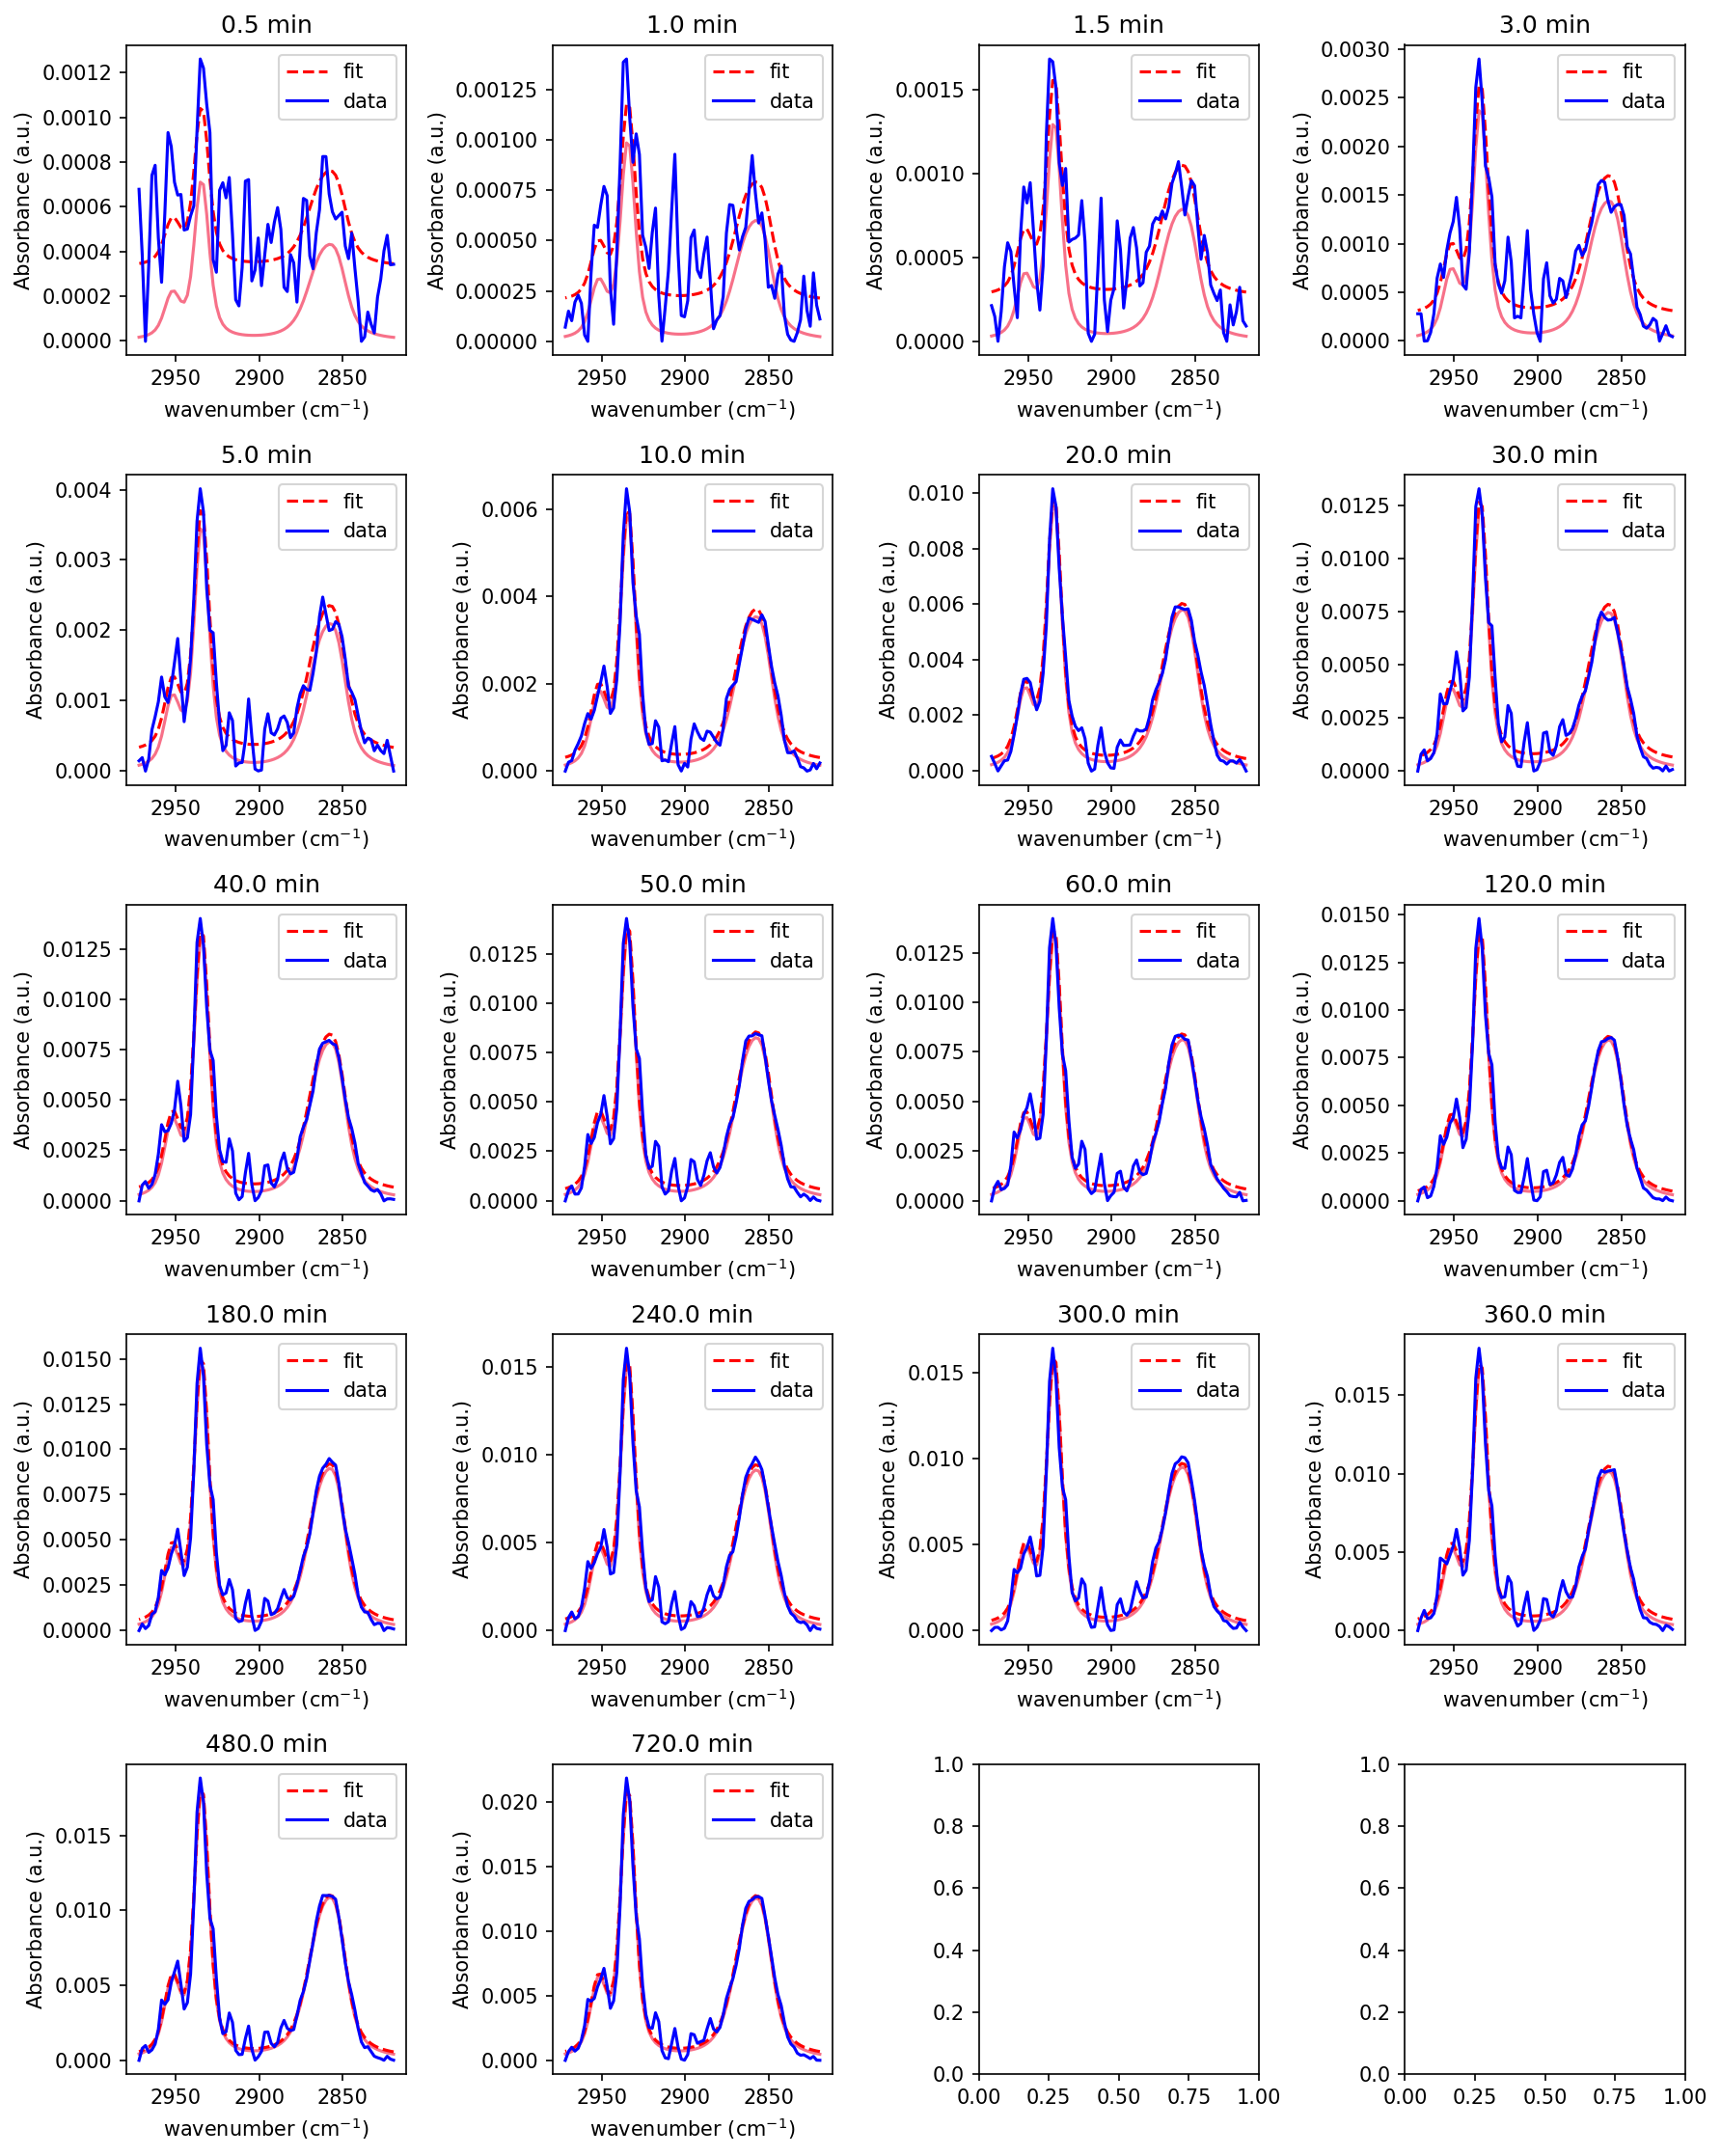

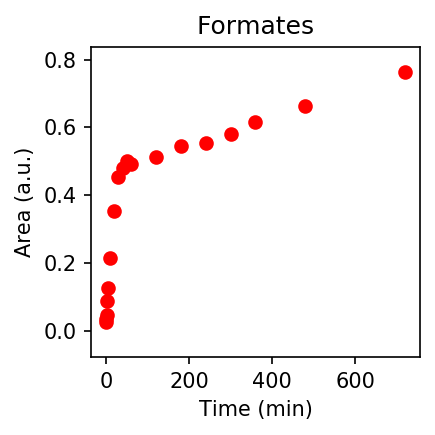

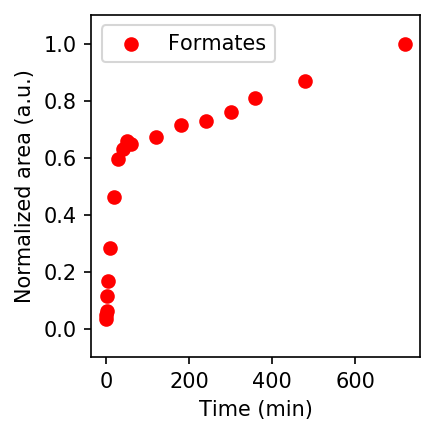

In [14]:
Vec_name=np.array(['Formates'])
Plot_data(new_params,x_CH,y_CH,Vec_fit,Time,Vec_name,False)

Information on the final optimized vector basis is printed below:

In [15]:
Print_var(new_params,np.array(['Formates']),Vec_IG_struc)

Species		Type		Peak (cm-1)	Variance (cm-1)	
Formates	Voigt		2862.2		6.0
		Voigt		2951.9		3.2
		Voigt		2852.7		3.9
		Voigt		2934.3		2.9


## Fitting the 1300-1700 cm$^{-1}$ region

Complex features from methane activation reside in this region. Analyzing the difference spectra is neccessary to capture all the possible peaks. From a rough examination of the data set, the following peaks are included in our initial guess.  

The peaks from the initial guess include a peak around 1600 cm$^{-1}$ as the C=O species, two peaks around 1540 cm$^{-1}$ for carbonates, 4 peaks around 1300 cm$^{-1}$ to 1500 cm$^{-1}$ for aromatics and finally, a two peaks around 1350 cm$^{-1}$ for the formates. 

We want to repeat the analysis following the algorithm developed as in the previous section, i.e.:

    1) Fit over the difference spectra to find all the peaks over all times. 
    2) Group the peaks and creat a vector basis categorizing all peaks into different surface species.
    3) Use the new vector basis to perform non-linear regression fit for optimization of the parameters.
  

### Fitting the initial stage (0,30) min

Another observation from the analysis of the difference spectra in this regions is that the peak shape and position from certain species, specially the aromatics seems to vary with time. To address such variation, the entire experiment period is splitted into three stages and each stage is examined separately following the algorithm, i.e. the charateristic peak shape from different surface species are assumed to be constant stage; though they can vary between different stages. 

We use postfix '_CC0' for fitting of this stage.

Below is an intial guess of the peaks.

In [16]:
Vec_IG_CC0 = {'Mus':np.array([1600, 1537.8, 1541.9, 1484.9, 1405.9, 1362.5, 1369.1, 1357.9, 1303.9]),
             'Sigmas':np.array([15.9, 4.4,11.4, 20.3,11.6, 12.7, 2.4, 4, 2.37]),
             'Types':np.array([1,0,1,1,1,1,0,0,0]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':True,
                     'Mus_min':np.array([1595,1537., 1500., 1460, 1370,1330, 1300, 1330, 1300.])}             
             }

In [17]:
t0 = time.time()
ndata = 8
fit_params_IG = Generate_params_IG(x_CC,Vec_IG_CC0,ndata = ndata)
fitter = Minimizer(loss_func_IG, fit_params_IG, fcn_args=(x_CC, y_CC[:ndata], Vec_IG_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 71.79036021232605


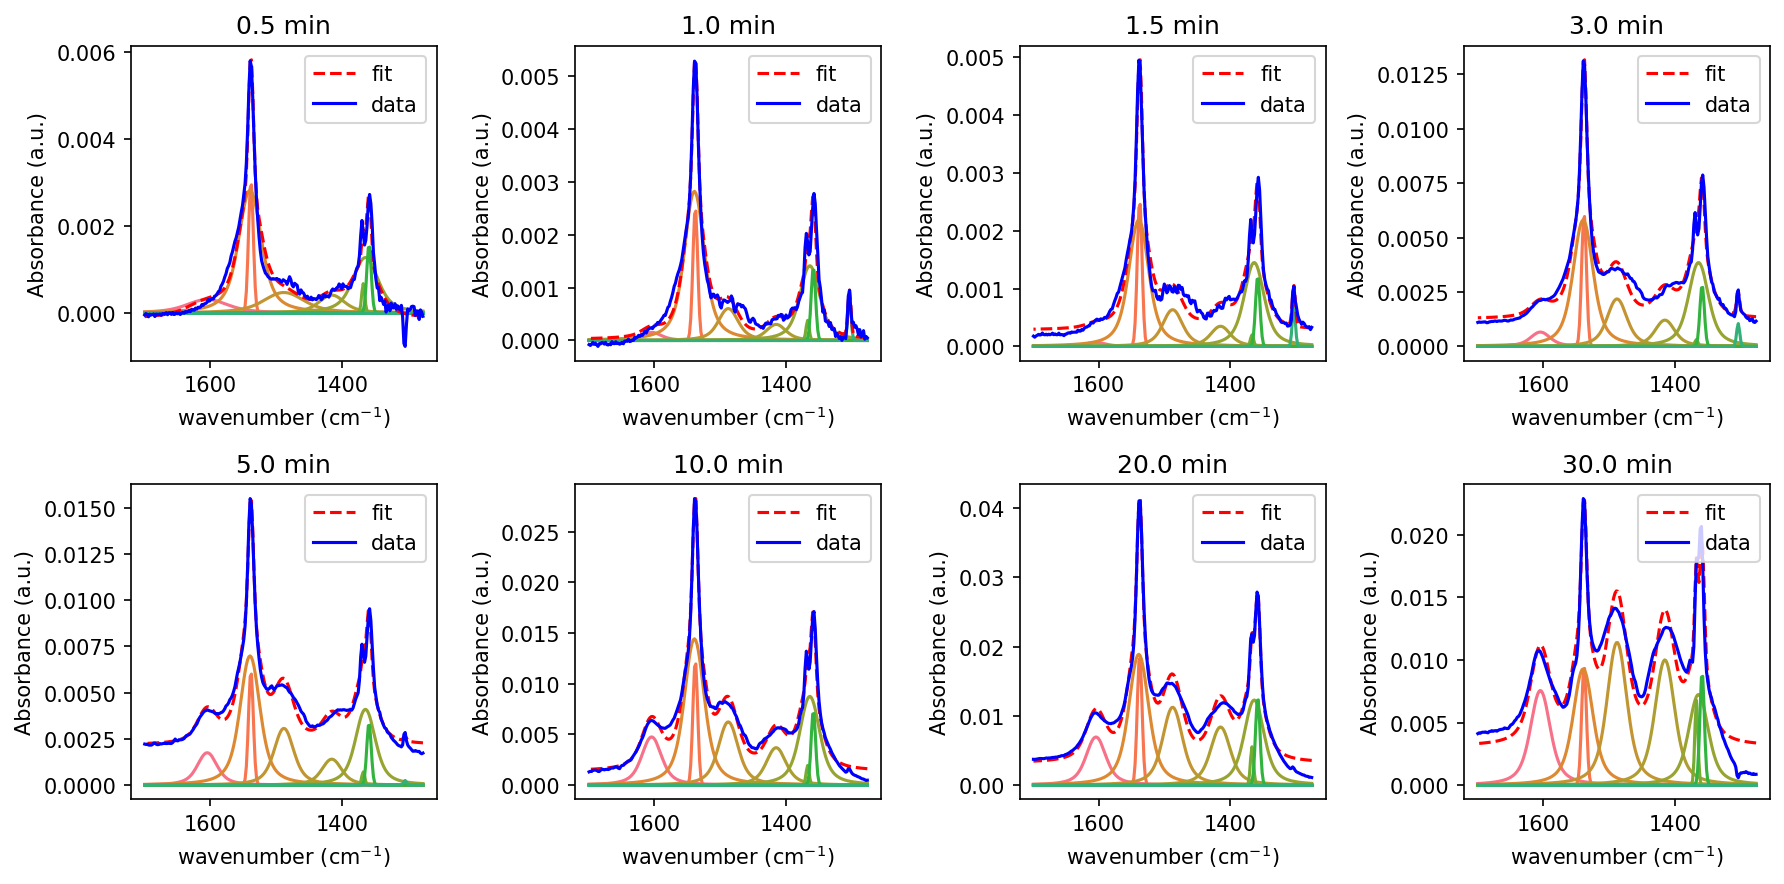

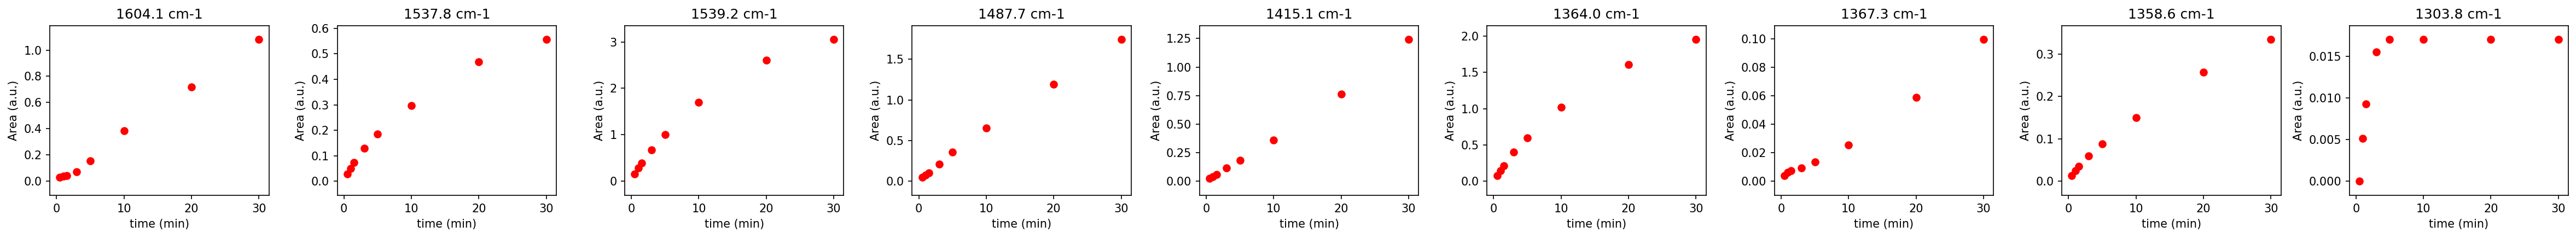

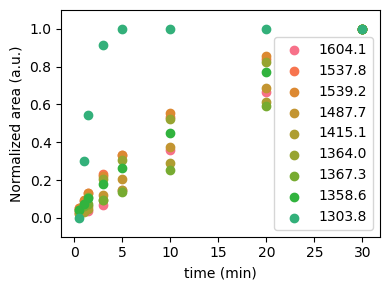

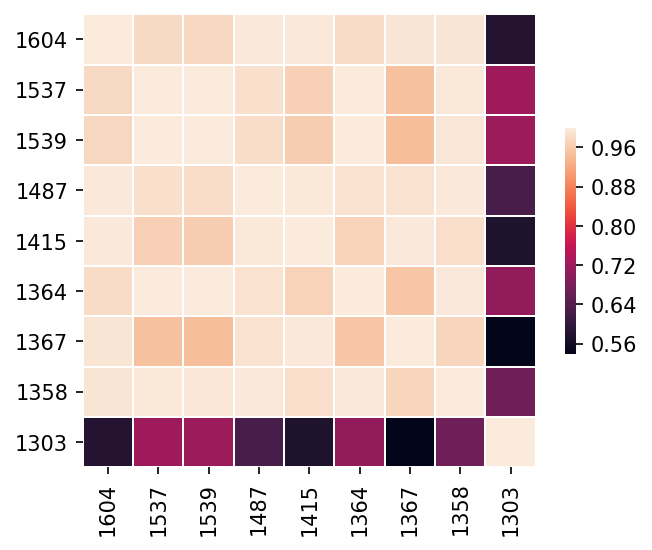

{'Peak Pos': [1604, 1537, 1539, 1487, 1415, 1364, 1367, 1358, 1303],
 'Amps': array([[3.06454128e-02, 2.75756690e-02, 1.54138326e-01, 4.57167921e-02,
         2.54645466e-02, 7.75384367e-02, 4.05181643e-03, 1.32993108e-02,
         5.55111512e-17],
        [3.79839486e-02, 5.04651907e-02, 2.89275278e-01, 7.46411514e-02,
         4.00345555e-02, 1.45266337e-01, 6.33880473e-03, 2.49646747e-02,
         5.13025294e-03],
        [4.12201954e-02, 7.34449780e-02, 3.94070903e-01, 1.05056969e-01,
         5.67223798e-02, 2.14776242e-01, 7.53932689e-03, 3.52247157e-02,
         9.28090562e-03],
        [7.27597977e-02, 1.29298959e-01, 6.72284140e-01, 2.09702514e-01,
         1.14618411e-01, 3.99558890e-01, 9.42851672e-03, 5.90516873e-02,
         1.55306201e-02],
        [1.56693603e-01, 1.85441479e-01, 1.00702249e+00, 3.56774590e-01,
         1.81968992e-01, 5.95912780e-01, 1.37208147e-02, 8.74889083e-02,
         1.70266536e-02],
        [3.84922110e-01, 2.97340886e-01, 1.69902793e+00, 6.5601

In [18]:
params_IG = result.params
Plot_data_IG(params_IG,x_CC,y_CC[:ndata],Vec_IG_CC0,Time[:ndata],True)

Now we want to creat a frame of the vector space, i.e. we need to define how many vectors are there and which peaks belong to which vector.

In [19]:
ndata = 8
Vec_IG_CC0 = {'Peaks':np.array([[0],[1,2],[3,4,5],[6,7],[8]]),
              'Types':np.array([[1],[0,1],[1,1,1],[0,0],[0]])}
Vec_fit_CC0 = Generate_Vec_IG(params_IG,Vec_IG_CC0,ndata)
#Vec_fit['Vec0']['Lims'] = {'Peaks':np.array([0,1,2,3]),
#                           'Specs':np.array([[0.1,0.1,0.1,0.1],
#                                            [4000,4000,4000,4000],
#                                            [0.1,.1,0.1,0.1],
#                                            [6.5,6.5,6.5,6.5]])}


Optimzation of the parameters.

In [20]:
t0 = time.time()
Vec_fit_CC0['Alphas'] = None
Vec_fit_CC0['Vec3']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[0,0],[4000,4000],[1.2,1.2],[4,4],[0,0]]),
                               'Pos': None}
fit_params_CC0 = Generate_params(x_CC,Vec_fit_CC0,ndata =ndata)

fitter = Minimizer(loss_func, fit_params_CC0, fcn_args=(x_CC, y_CC[:ndata], Vec_fit_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 20.669999999999863 5.669999999999863 35.66999999999986
0 1604.1121495233926 1574.1121495233926 1634.1121495233926
1 3.6449789671375514 0.1 8.64497896713755
1 1537.8023856291989 1532.8023856291989 1542.8023856291989
1 11.4 0.1 26.4
1 1539.1814680568384 1509.1814680568384 1569.1814680568384
2 20.3 5.300000000000001 35.3
2 1487.7411038248122 1457.7411038248122 1517.7411038248122
2 12.966972008624335 0.1 27.966972008624335
2 1415.099945690003 1385.099945690003 1445.099945690003
2 12.7 0.1 27.7
2 1364.021565779076 1334.021565779076 1394.021565779076
3 2.4 1.2 4.0
3 1367.288794037405 1362.288794037405 1372.288794037405
3 3.378946795651329 1.2 4.0
3 1358.5788790097915 1353.5788790097915 1363.5788790097915
4 2.37 0.1 7.37
4 1303.8364738288678 1298.8364738288678 1308.8364738288678
The time cost is: 22.329660892486572


The R2 score of the fit is: 0.99
Plotting.....


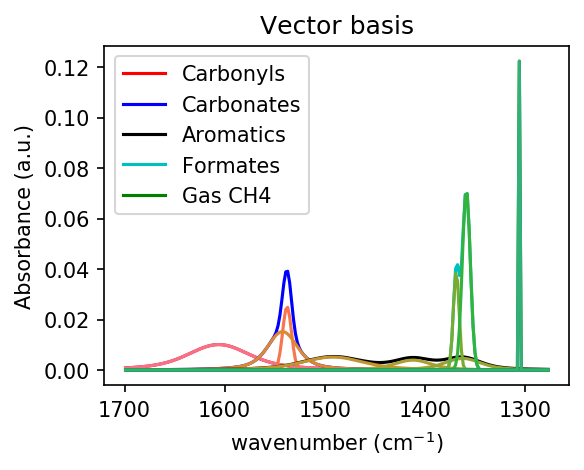

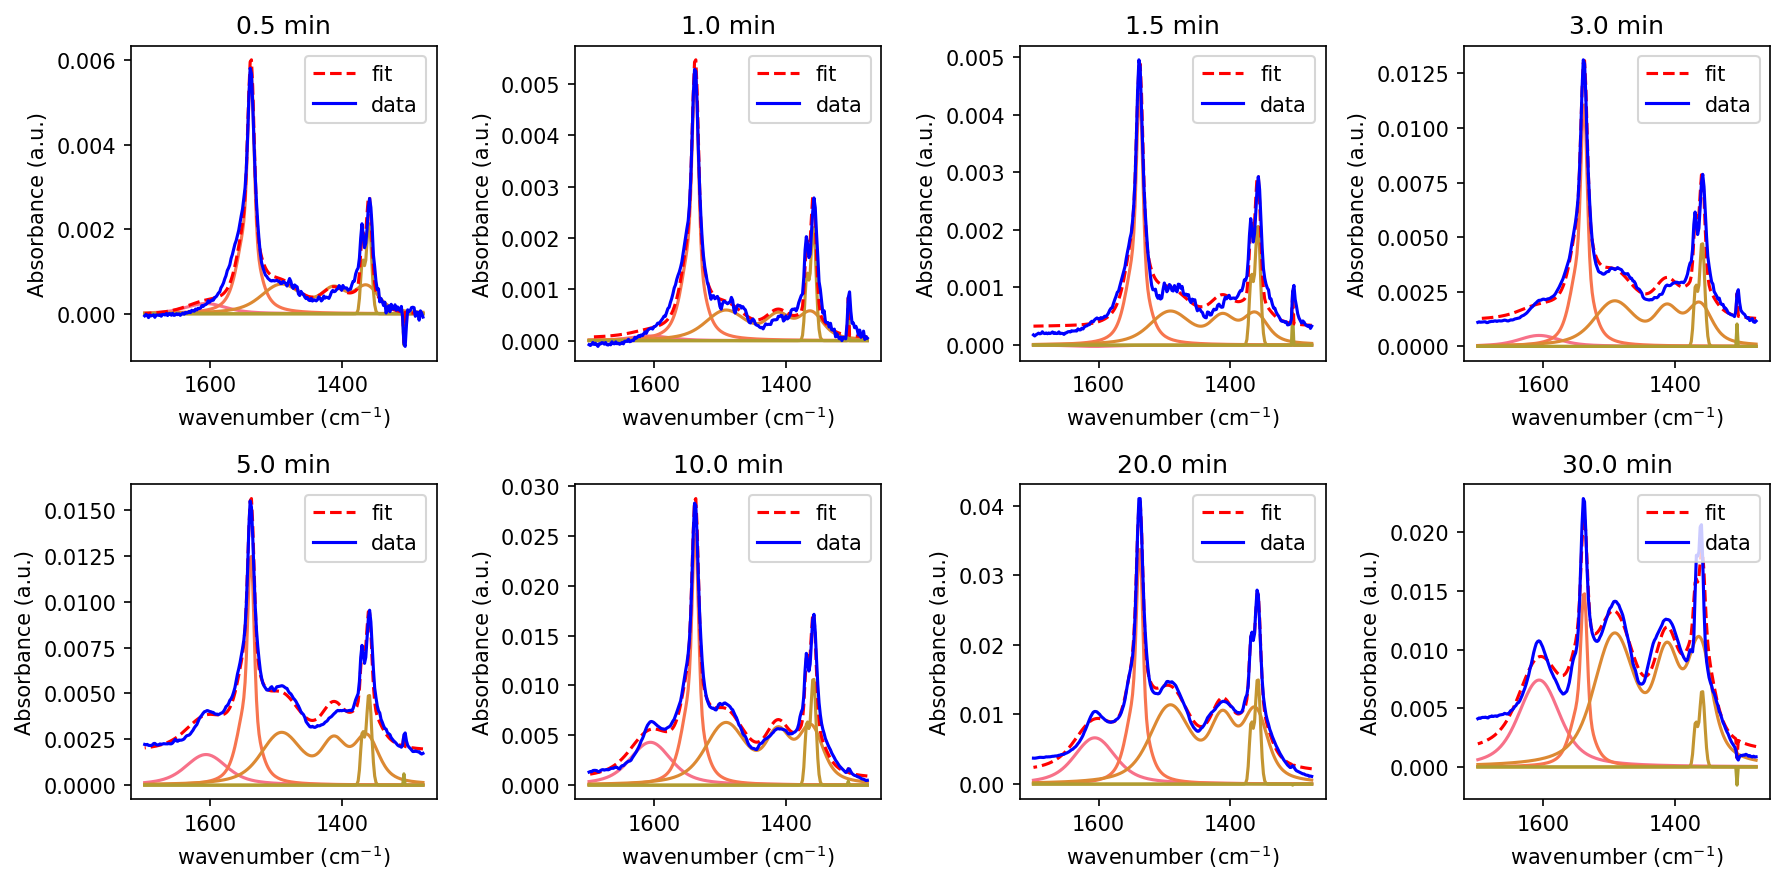

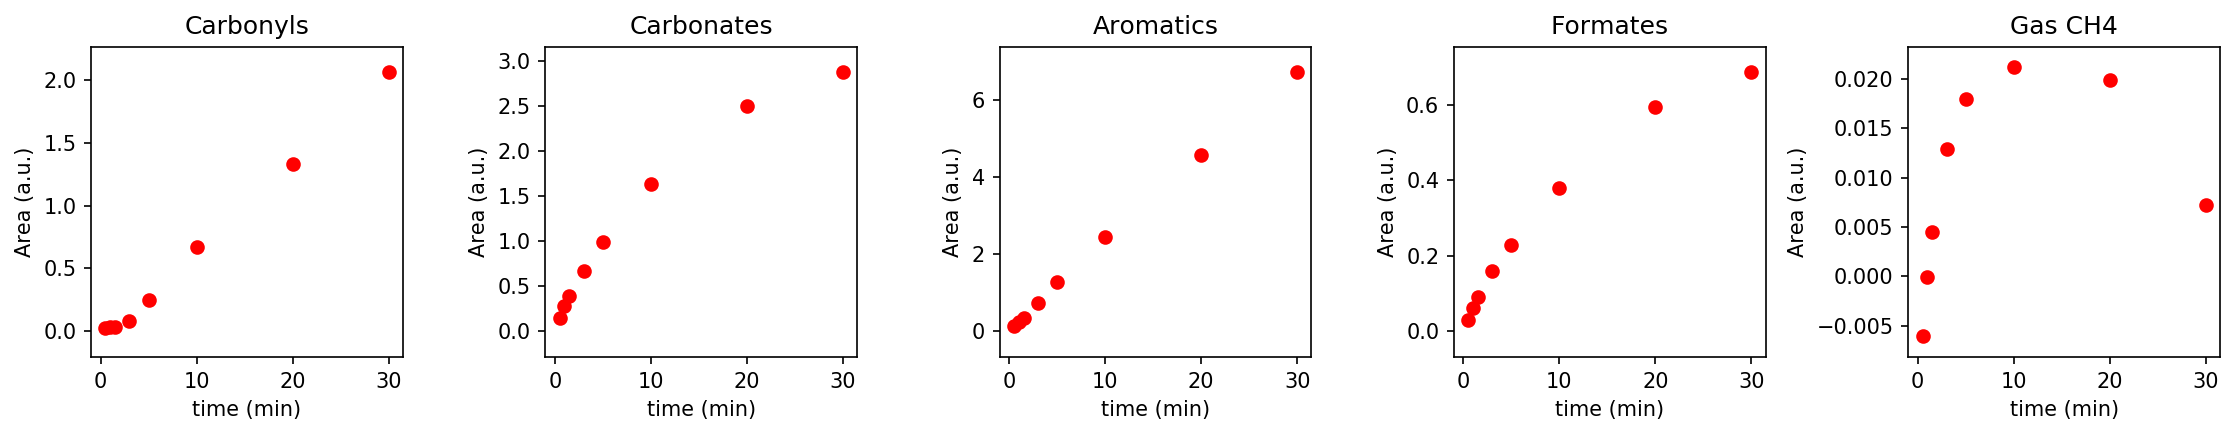

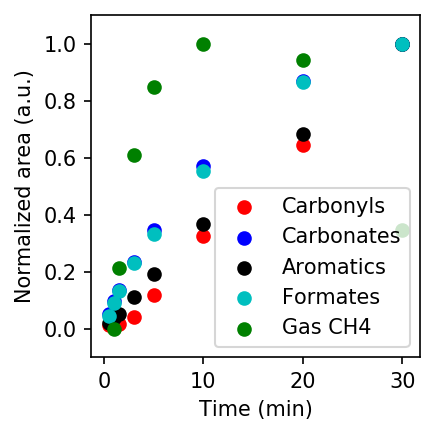

In [21]:
new_params_CC0 = result.params

yhat_CC0 = Generate_data(new_params_CC0,x_CC,Vec_fit_CC0,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CC[:ndata].flatten(), yhat_CC0.flatten())))
Vec_name_CC0 = np.array(['Carbonyls','Carbonates','Aromatics','Formates','Gas CH4'])
Plot_data(new_params_CC0,x_CC,y_CC[:ndata],Vec_fit_CC0,Time[:ndata],Vec_name_CC0,True)

### Fitting the Middle Stage (30,120) min

We use postfix _CC1 for the fitting of this stgae.

In [22]:
Vec_CC_IG1 = {'Mus':np.array([1605.1, 1536.8, 1559.5, 1495.7, 1415.0, 1365.2, 1367.2, 1360.3, 1303.9]),
             'Sigmas':np.array([15.0, 3.2,13.85, 11.90, 10.93, 14.42, 2.07, 3.25, 2.37]),
             'Types':np.array([1,0,1,1,1,1,0,0,0]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':False,
                     'Mus_min':np.array([1595,1537., 1500., 1460, 1370,1330, 1300, 1330, 1300.])}
             }

In [23]:
t0 = time.time()
nstart = 8
ndata = 4

fit_params_IG1 = Generate_params_IG(x_CC,Vec_CC_IG1,ndata = ndata)

fitter = Minimizer(loss_func_IG, fit_params_IG1, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_CC_IG1))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 12.745649099349976


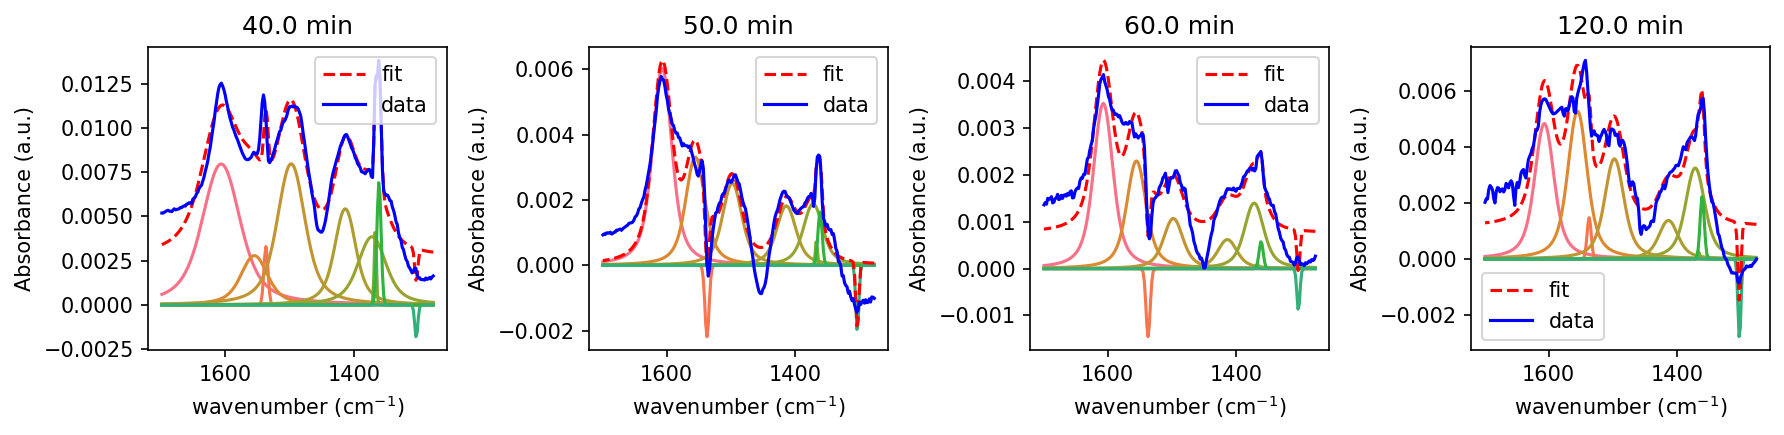

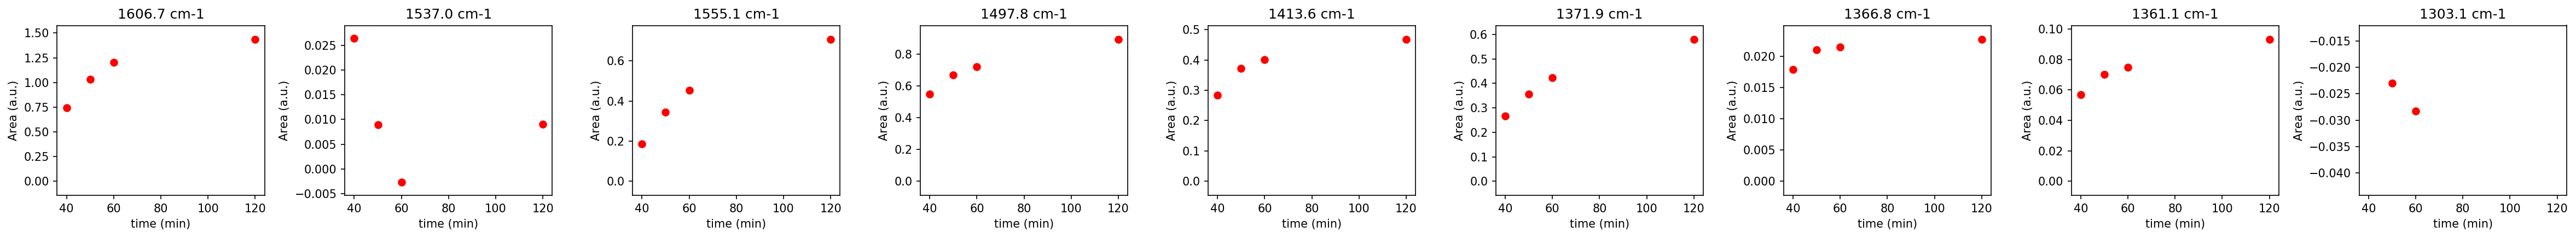

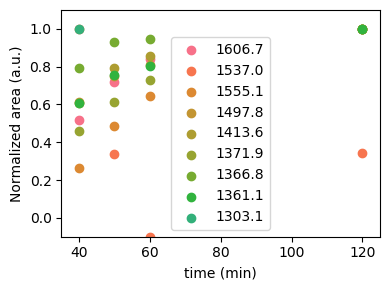

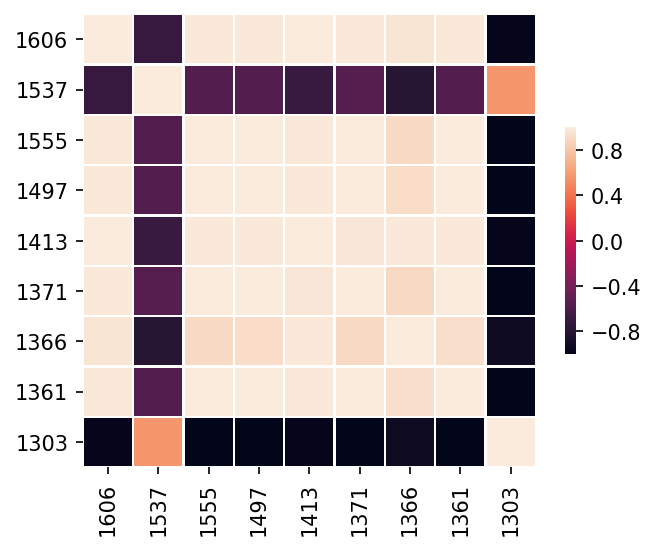

{'Peak Pos': [1606, 1537, 1555, 1497, 1413, 1371, 1366, 1361, 1303],
 'Amps': array([[ 0.74432383,  0.02644914,  0.18492276,  0.54855872,  0.28459619,
          0.26631359,  0.01793924,  0.05675826, -0.01098634],
        [ 1.03338076,  0.00890985,  0.34383283,  0.66897814,  0.37182823,
          0.35658103,  0.02106225,  0.07015774, -0.02303151],
        [ 1.20248374, -0.00274402,  0.45401268,  0.72032986,  0.40153408,
          0.42362921,  0.02149051,  0.07486402, -0.02833081],
        [ 1.43405945,  0.00907475,  0.70667468,  0.89153216,  0.46738329,
          0.57914168,  0.02269155,  0.09310268, -0.04532548]])}

In [24]:
params_IG1 = result.params
Plot_data_IG(params_IG1,x_CC,y_CC[nstart:nstart+ndata],Vec_CC_IG1,Time[nstart:nstart+ndata],True)

In [25]:
Vec_fit_CC1 = Generate_Vec_IG(params_IG,Vec_IG_CC0,ndata)

In [26]:
t0 = time.time()
Vec_fit_CC1['Alphas'] = None
Vec_fit_CC1['Vec3']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1360,1360],[1370,1370],[1.2,1.2],[3.5,4],[-10,-10]]),
                               'Pos':None}
fit_params_CC1 = Generate_params(x_CC,Vec_fit_CC1,ndata =ndata)
fitter = Minimizer(loss_func, fit_params_CC1, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_fit_CC1))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 20.669999999999863 5.669999999999863 35.66999999999986
0 1604.1121495233926 1574.1121495233926 1634.1121495233926
1 3.6449789671375514 0.1 8.64497896713755
1 1537.8023856291989 1532.8023856291989 1542.8023856291989
1 11.4 0.1 26.4
1 1539.1814680568384 1509.1814680568384 1569.1814680568384
2 20.3 5.300000000000001 35.3
2 1487.7411038248122 1457.7411038248122 1517.7411038248122
2 12.966972008624335 0.1 27.966972008624335
2 1415.099945690003 1385.099945690003 1445.099945690003
2 12.7 0.1 27.7
2 1364.021565779076 1334.021565779076 1394.021565779076
3 2.4 1.2 3.5
3 1367.288794037405 1362.288794037405 1370.0
3 3.378946795651329 1.2 4.0
3 1358.5788790097915 1360.0 1363.5788790097915
4 2.37 0.1 7.37
4 1303.8364738288678 1298.8364738288678 1308.8364738288678
The time cost is: 156.01391983032227


The R2 score of the fit is: 0.96
Plotting.....


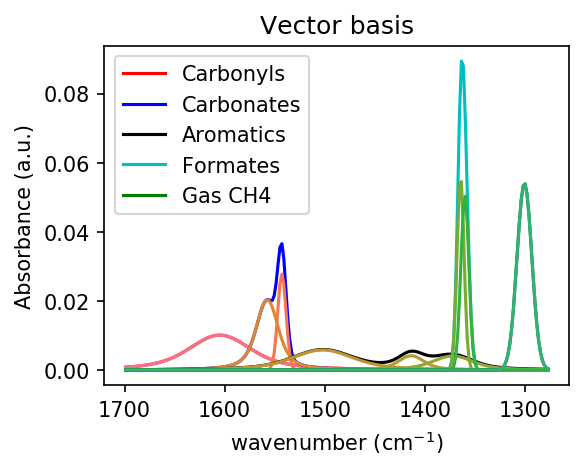

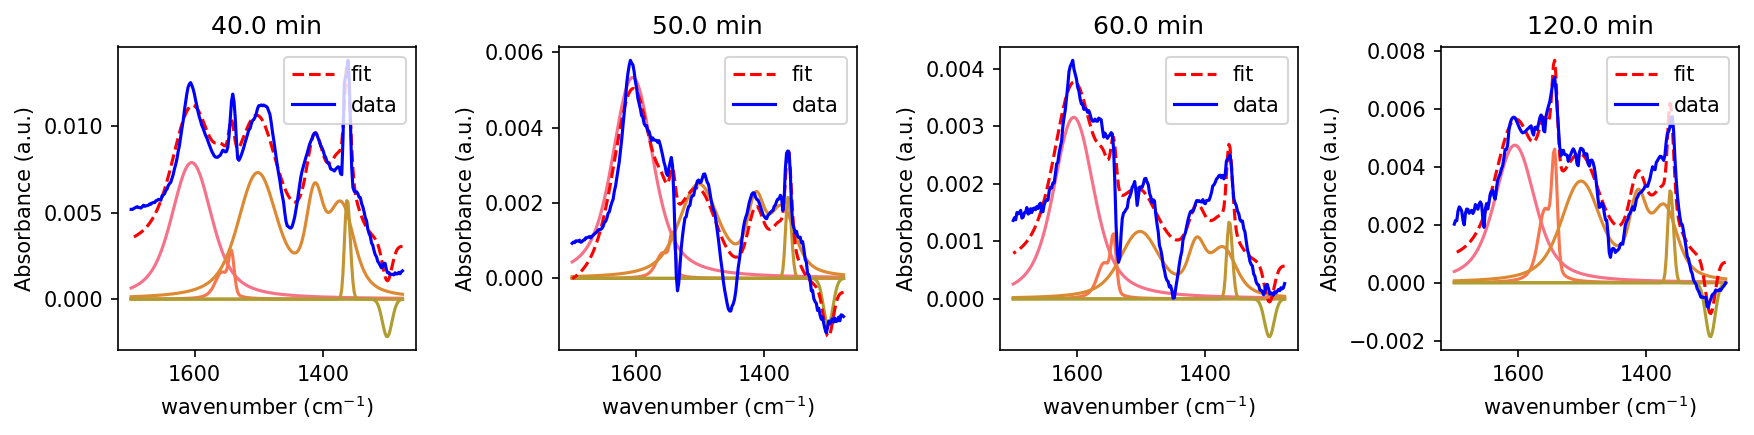

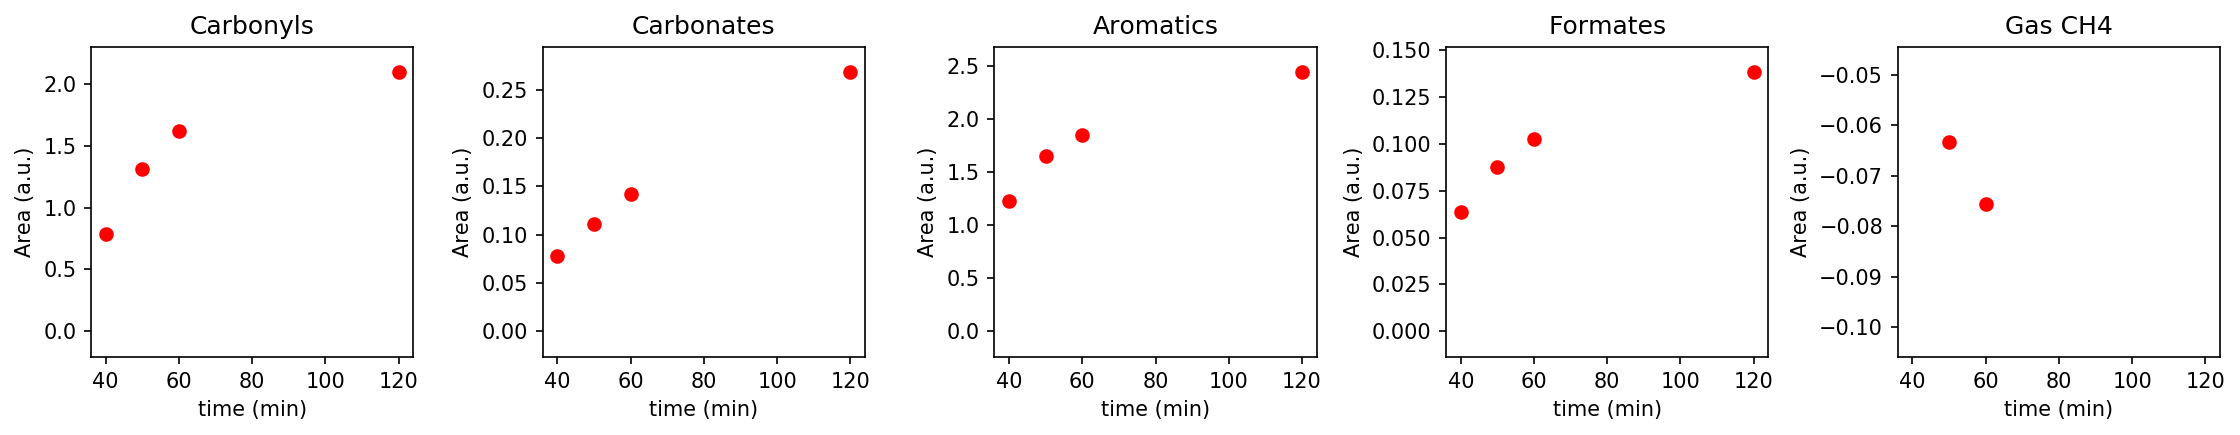

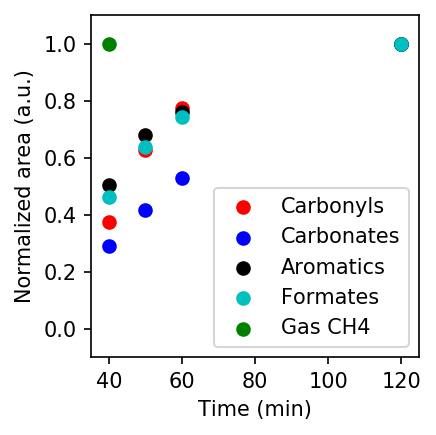

In [27]:
new_params_CC1 = result.params
yhat_CC1 = Generate_data(new_params_CC1,x_CC,Vec_fit_CC1,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CC[nstart:nstart+ndata].flatten(), yhat_CC1.flatten())))
Vec_name_CC0 = np.array(['Carbonyls','Carbonates','Aromatics','Formates','Gas CH4'])
Plot_data(new_params_CC1,x_CC,y_CC[nstart:nstart+ndata],Vec_fit_CC1,Time[nstart:nstart+ndata],Vec_name_CC0,True)

### Fitting the Final Stage (180,720) min

We use postfix _CC2 for the fitting of this stage.

In [28]:
Vec_IG_CC2 = {'Mus':np.array([1600, 1537.8, 1541.7, 1473.6, 1386, 1352, 1369.1, 1357.9, 1303.9]),
             'Sigmas':np.array([15.9, 4.4,18.7, 20, 18, 8.7, 2.4, 4, 2.37]),
             'Types':np.array([0,1,0,0,0,0,1,1,1]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':False,
                     'Mus_min':np.array([1595,1537., 1500., 1460, 1370,1330, 1300, 1330, 1300.])}
             }


In [29]:
t0 = time.time()
nstart = 12
ndata = 6
fit_params_IG2 = Generate_params_IG(x_CC,Vec_IG_CC2,ndata = ndata)
fitter = Minimizer(loss_func_IG, fit_params_IG2, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_IG_CC2))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 30.22206687927246


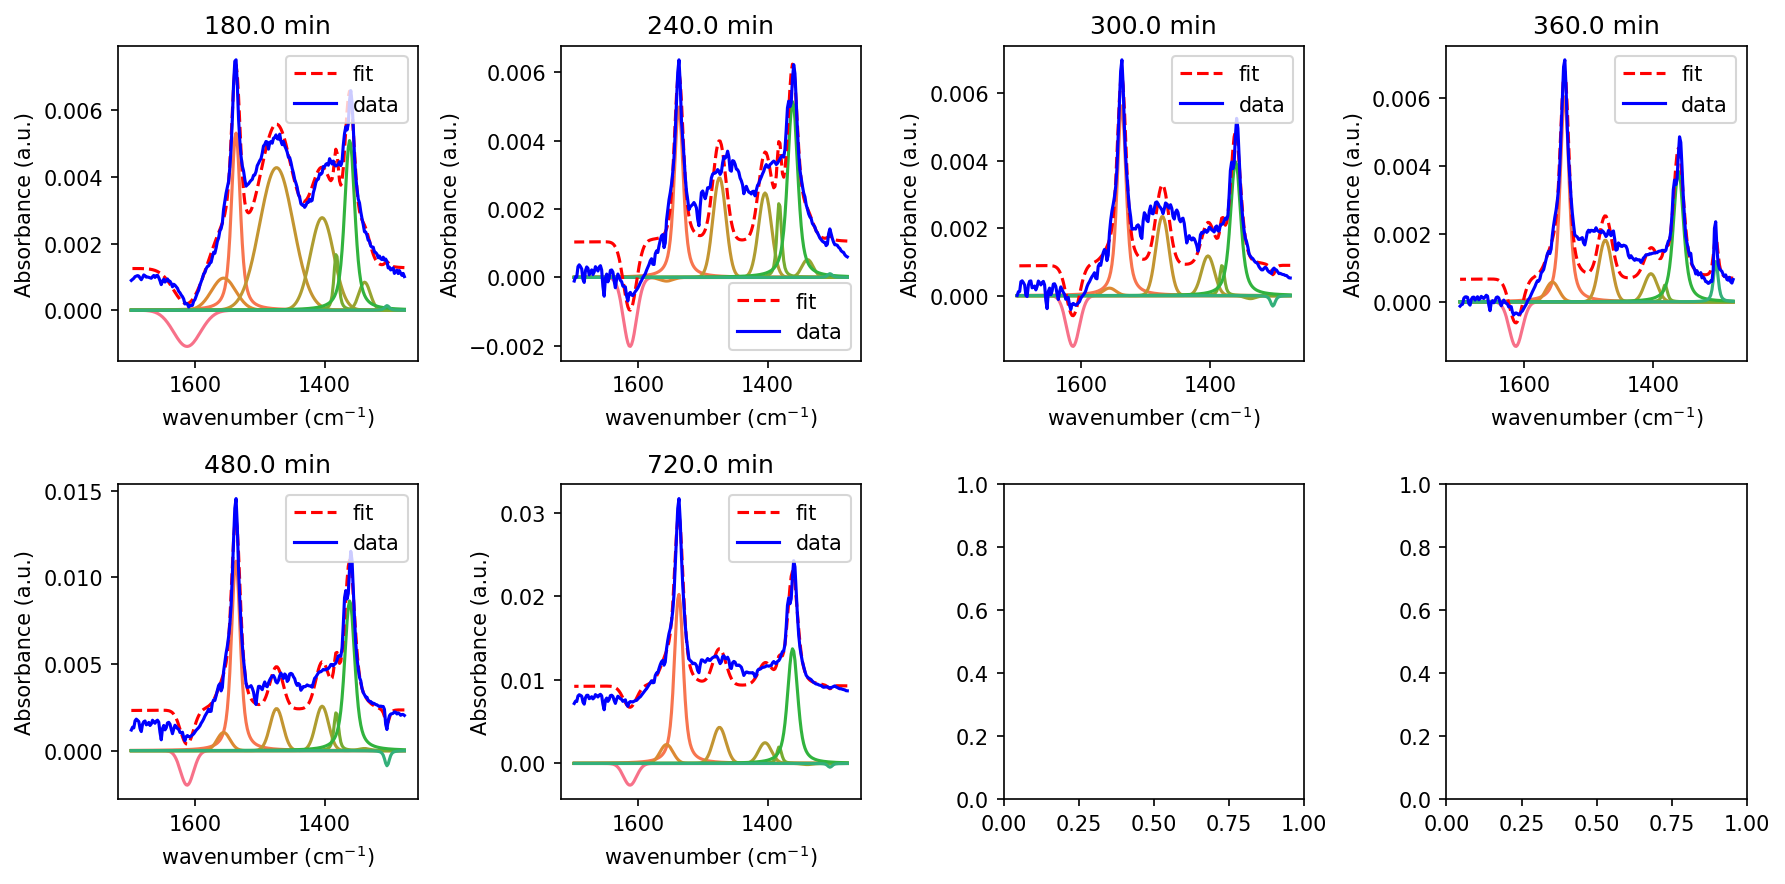

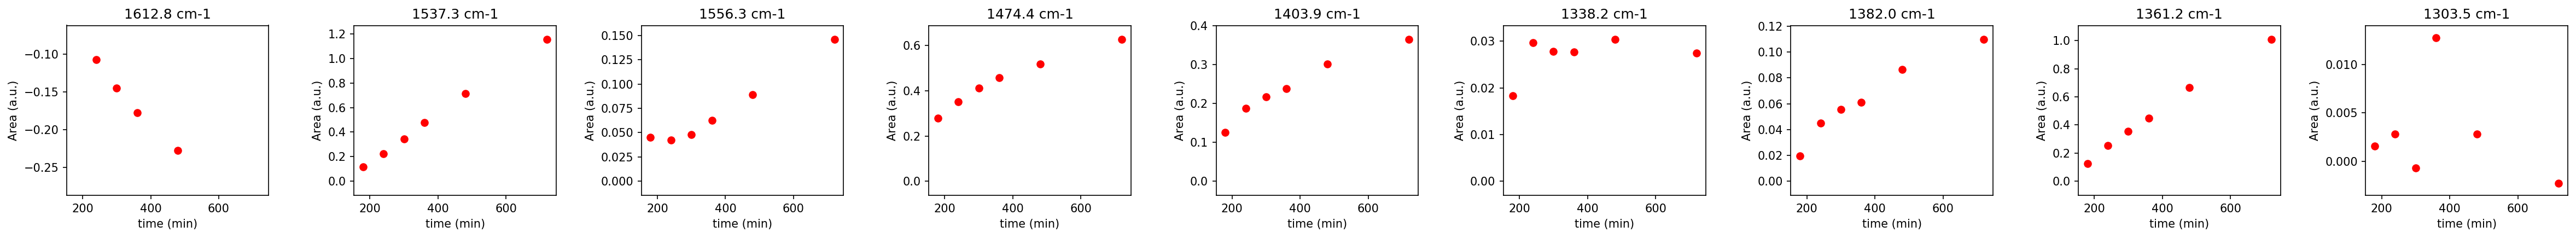

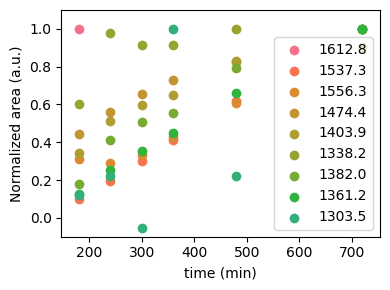

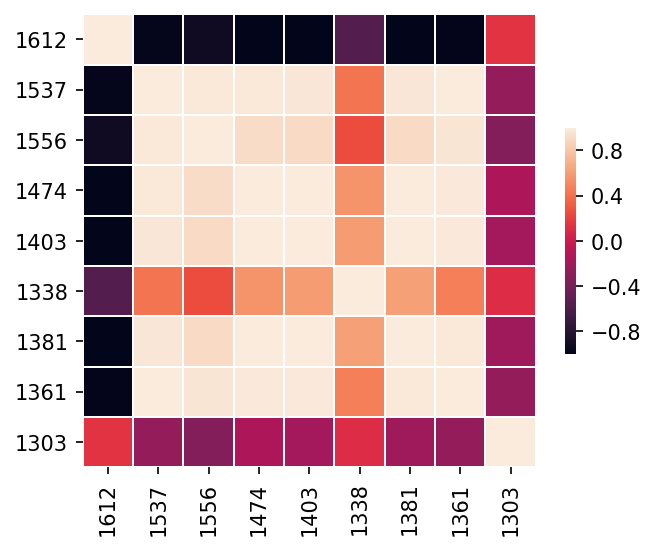

{'Peak Pos': [1612, 1537, 1556, 1474, 1403, 1338, 1381, 1361, 1303],
 'Amps': array([[-5.63152398e-02,  1.15455566e-01,  4.52060819e-02,
          2.79109619e-01,  1.25453004e-01,  1.83672743e-02,
          1.96380635e-02,  1.27050595e-01,  1.57240658e-03],
        [-1.06960260e-01,  2.23585364e-01,  4.25153531e-02,
          3.52206495e-01,  1.87341091e-01,  2.97315724e-02,
          4.49733981e-02,  2.55246759e-01,  2.81408488e-03],
        [-1.44750635e-01,  3.45667586e-01,  4.80803550e-02,
          4.11127882e-01,  2.16859004e-01,  2.77780534e-02,
          5.54175494e-02,  3.54295135e-01, -7.09011782e-04],
        [-1.77672593e-01,  4.76667667e-01,  6.26907151e-02,
          4.56711832e-01,  2.37656792e-01,  2.77479403e-02,
          6.11550442e-02,  4.50176381e-01,  1.27731213e-02],
        [-2.27700625e-01,  7.13843753e-01,  8.89033235e-02,
          5.17531941e-01,  3.01886468e-01,  3.03624553e-02,
          8.67403899e-02,  6.65424935e-01,  2.82944950e-03],
        [-2.929614

In [30]:
params_IG2 = result.params
Plot_data_IG(params_IG2,x_CC,y_CC[nstart:nstart+ndata],Vec_IG_CC2,Time[nstart:nstart+ndata],True)

In [31]:
Vec_fit_CC2 = Generate_Vec_IG(params_IG2,Vec_IG_CC0,ndata)

In [32]:
t0 = time.time()
Vec_fit_CC2['Vec3']['Mus'][0]=1365.5
Vec_fit_CC2['Alphas'] = None
Vec_fit_CC2['Vec0']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[0],[4000],[10],[18],[-10]]),
                               'Pos': None}
Vec_fit_CC2['Vec3']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1350,1350],[1370,1370],[1.2,1.2],[3.5,4],[-1,-1]]),
                               'Pos': None}

fit_params_CC2 = Generate_params(x_CC,Vec_fit_CC2,ndata=ndata)

fitter = Minimizer(loss_func, fit_params_CC2, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_fit_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 20.669999470555247 10 18
0 1612.796364448534 1582.796364448534 1642.796364448534
1 4.5254008877353975 0.1 9.525400887735398
1 1537.3090243769354 1532.3090243769354 1542.3090243769354
1 18.7 3.6999999999999993 33.7
1 1556.2741474289132 1526.2741474289132 1586.2741474289132
2 25.99999999999999 10.99999999999999 40.999999999999986
2 1474.3753819908904 1444.3753819908904 1504.3753819908904
2 18.0 3.0 33.0
2 1403.9089240038822 1373.9089240038822 1433.9089240038822
2 8.7 0.1 23.7
2 1338.2132756593442 1308.2132756593442 1368.2132756593442
3 2.4 1.2 3.5
3 1365.5 1360.5 1370.0
3 5.199999999999999 1.2 4.0
3 1361.1731296047337 1356.1731296047337 1366.1731296047337
4 2.37 0.1 7.37
4 1303.4918723172643 1298.4918723172643 1308.4918723172643
The time cost is: 1.4283597469329834


The R2 score of the fit is: 0.99
Plotting.....


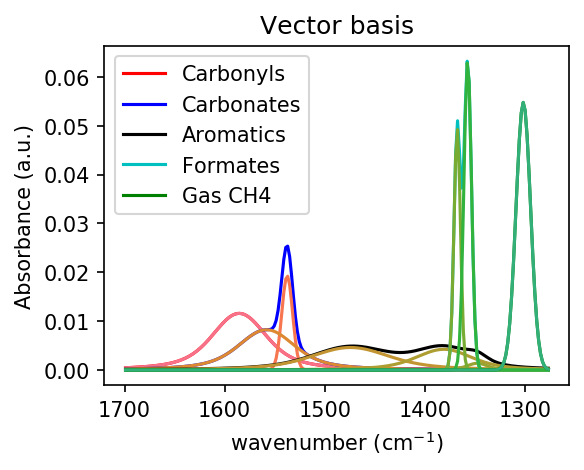

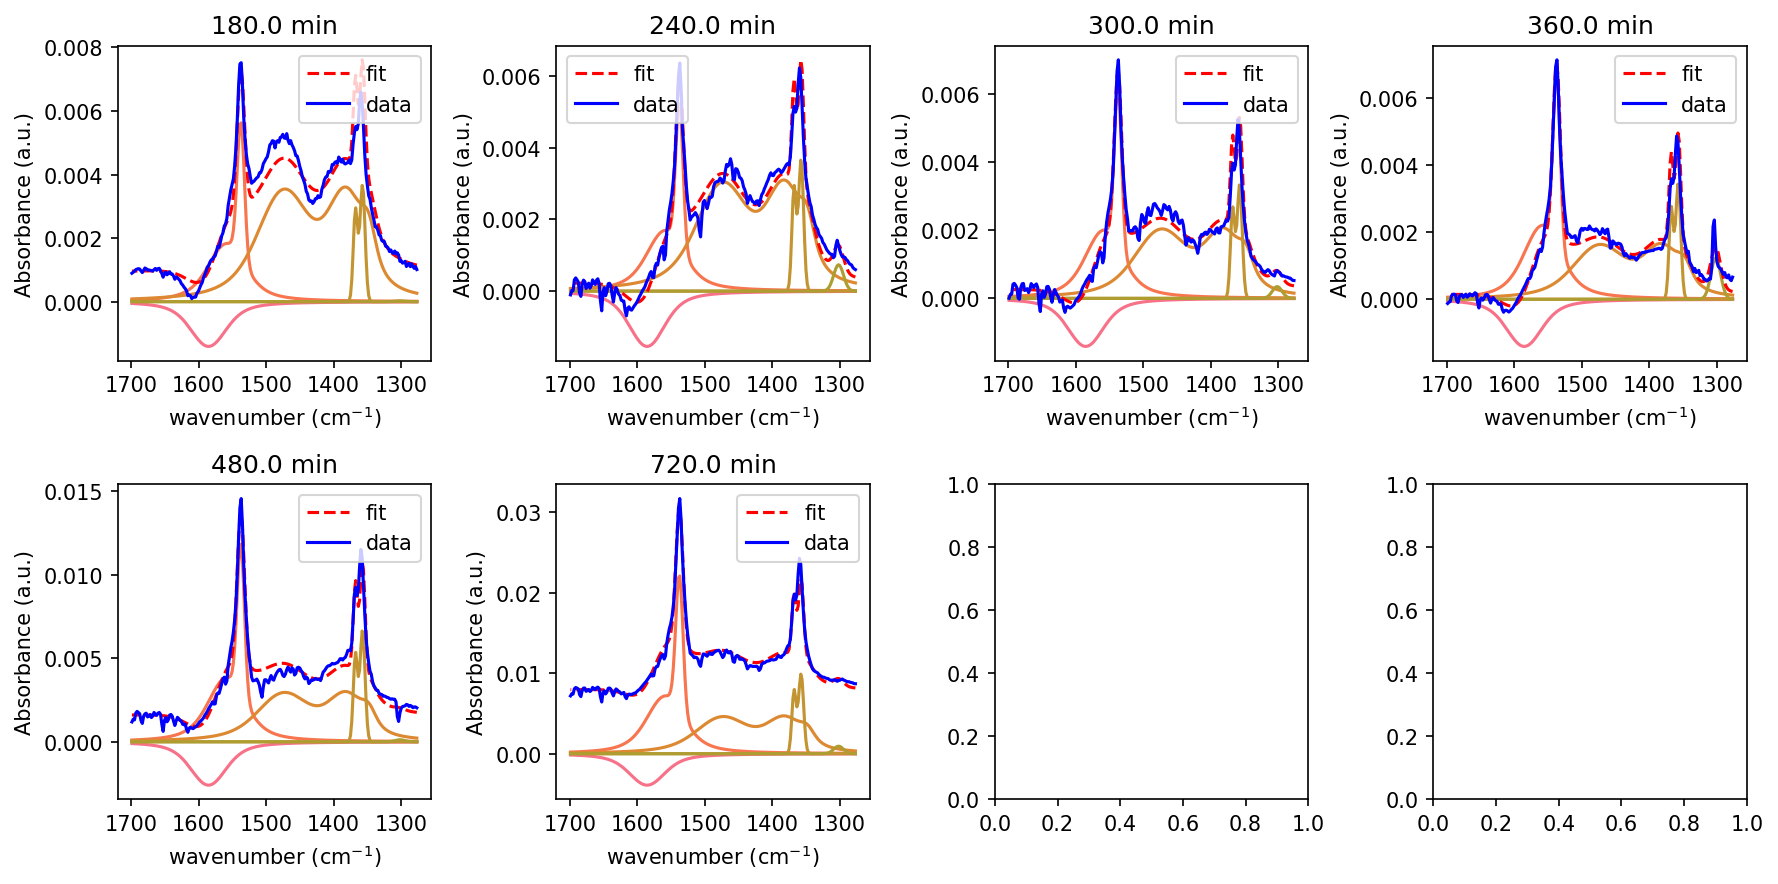

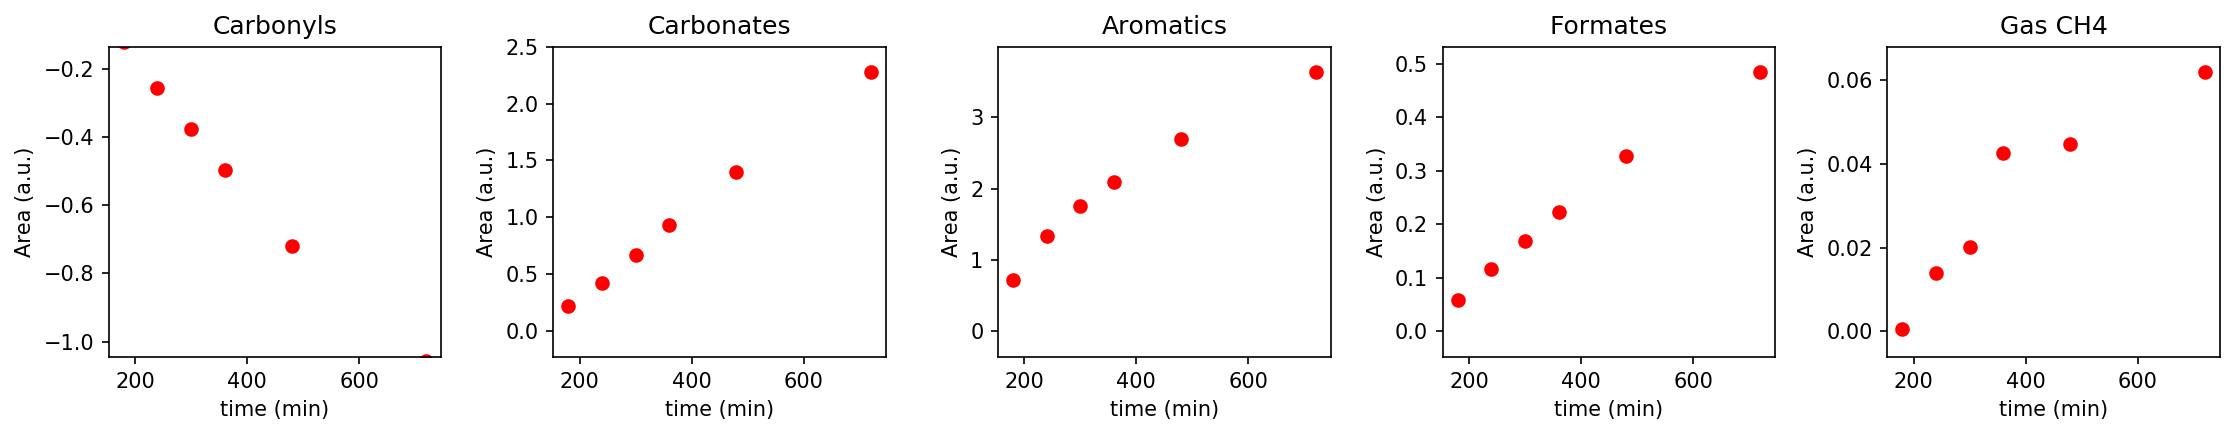

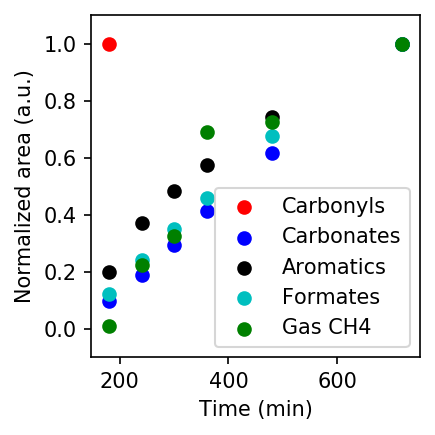

In [33]:
new_params_CC2 = result.params
yhat_CC2 = Generate_data(new_params_CC2,x_CC,Vec_fit_CC2,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CC[nstart:nstart+ndata].flatten(), yhat_CC2.flatten())))
Plot_data(new_params_CC2,x_CC,y_CC[nstart:nstart+ndata],Vec_fit_CC2,Time[nstart:nstart+ndata],Vec_name_CC0,True)

### Combine the three Stages Together

Now, we want to evaluate the evolution of different species over the entire experiment period through combining the three stages together. 

array([[ 2.39183309e-02,  3.28680460e-02,  3.06772818e-02,
         8.04075937e-02,  2.45628447e-01,  6.71167370e-01,
         1.32948056e+00,  2.06330481e+00,  2.84624748e+00,
         3.37425367e+00,  3.68662931e+00,  4.15683730e+00,
         4.03540487e+00,  3.90243824e+00,  3.78102074e+00,
         3.65996706e+00,  3.43644204e+00,  3.09930069e+00],
       [ 1.46800134e-01,  2.79594005e-01,  3.90843068e-01,
         6.73601886e-01,  9.92198957e-01,  1.63489957e+00,
         2.49646871e+00,  2.87377932e+00,  2.95113244e+00,
         2.98480140e+00,  3.01570581e+00,  3.14170560e+00,
         3.36362154e+00,  3.56912020e+00,  3.81162988e+00,
         4.07825826e+00,  4.54404271e+00,  5.41533942e+00],
       [ 1.31452066e-01,  2.42801292e-01,  3.53324630e-01,
         7.43270348e-01,  1.28072579e+00,  2.45524527e+00,
         4.58218864e+00,  6.71505957e+00,  7.94604857e+00,
         8.36737352e+00,  8.56425518e+00,  9.15377868e+00,
         9.87559360e+00,  1.04957080e+01,  1.09101855e

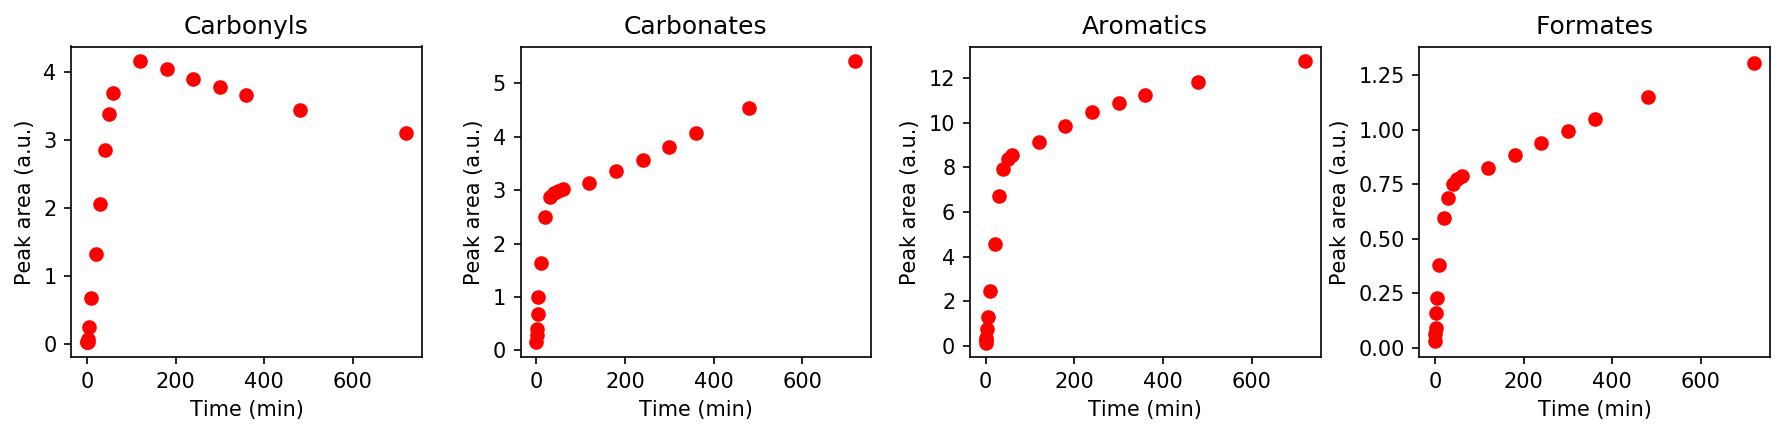

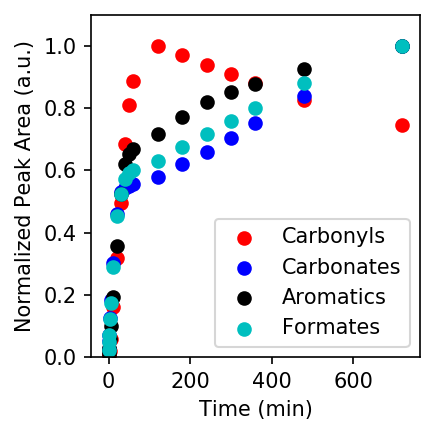

In [34]:
Param_com = {'Params': (new_params_CC0,new_params_CC1,new_params_CC2) ,
            'Lens':np.array([8,4,6])}
Plot_com_data(Param_com,Vec_IG_CC0,Time,Vec_name_CC0,True)

In [35]:
for i in range(3):
    Print_var(Param_com['Params'][i],np.array(['Carbonyls','Carbonates','Aromatics','Formates','Gas CH4\t']),Vec_IG_CC0)

Species		Type		Peak (cm-1)	Variance (cm-1)	
Carbonyls	Voigt		1605.9		20.7
Carbonates	Gaussian	1537.7		4.4
		Voigt		1542.2		9.9
Aromatics	Voigt		1491.9		20.3
		Voigt		1412.0		12.3
		Voigt		1362.1		12.2
Formates	Gaussian	1368.6		2.9
		Gaussian	1358.6		4.0
Gas CH4		Gaussian	1305.9		0.1
Species		Type		Peak (cm-1)	Variance (cm-1)	
Carbonyls	Voigt		1604.8		20.7
Carbonates	Gaussian	1542.8		4.2
		Voigt		1557.4		7.3
Aromatics	Voigt		1502.2		20.3
		Voigt		1413.5		8.6
		Voigt		1372.0		13.5
Formates	Gaussian	1364.3		3.5
		Gaussian	1360.0		4.0
Gas CH4		Gaussian	1300.5		7.4
Species		Type		Peak (cm-1)	Variance (cm-1)	
Carbonyls	Voigt		1585.5		18.0
Carbonates	Gaussian	1537.5		5.4
		Voigt		1558.2		18.7
Aromatics	Voigt		1474.3		26.0
		Voigt		1381.0		18.6
		Voigt		1347.6		7.0
Formates	Gaussian	1367.6		3.2
		Gaussian	1357.2		3.8
Gas CH4		Gaussian	1301.6		7.3


## Fitting the 1000 - 1300 cm$^{-1}$ region

This region contains charistic peaks from C-O speices. 

In [36]:
Vec_IG_CO = {'Mus':np.array([1086.8, 1219.9, 1220.2]),
          'Sigmas':np.array([13.8,3.6,17.3]),
          'Types':np.array([1,0,1]),
          'Fixed':None,
          'Lims':None}

In [37]:
t0 = time.time()
fit_params_IG_CO = Generate_params_IG(x_CO,Vec_IG_CO,ndata =18)

fitter = Minimizer(loss_func_IG, fit_params_IG_CO, fcn_args=(x_CO, y_CO, Vec_IG_CO))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 3.66271710395813


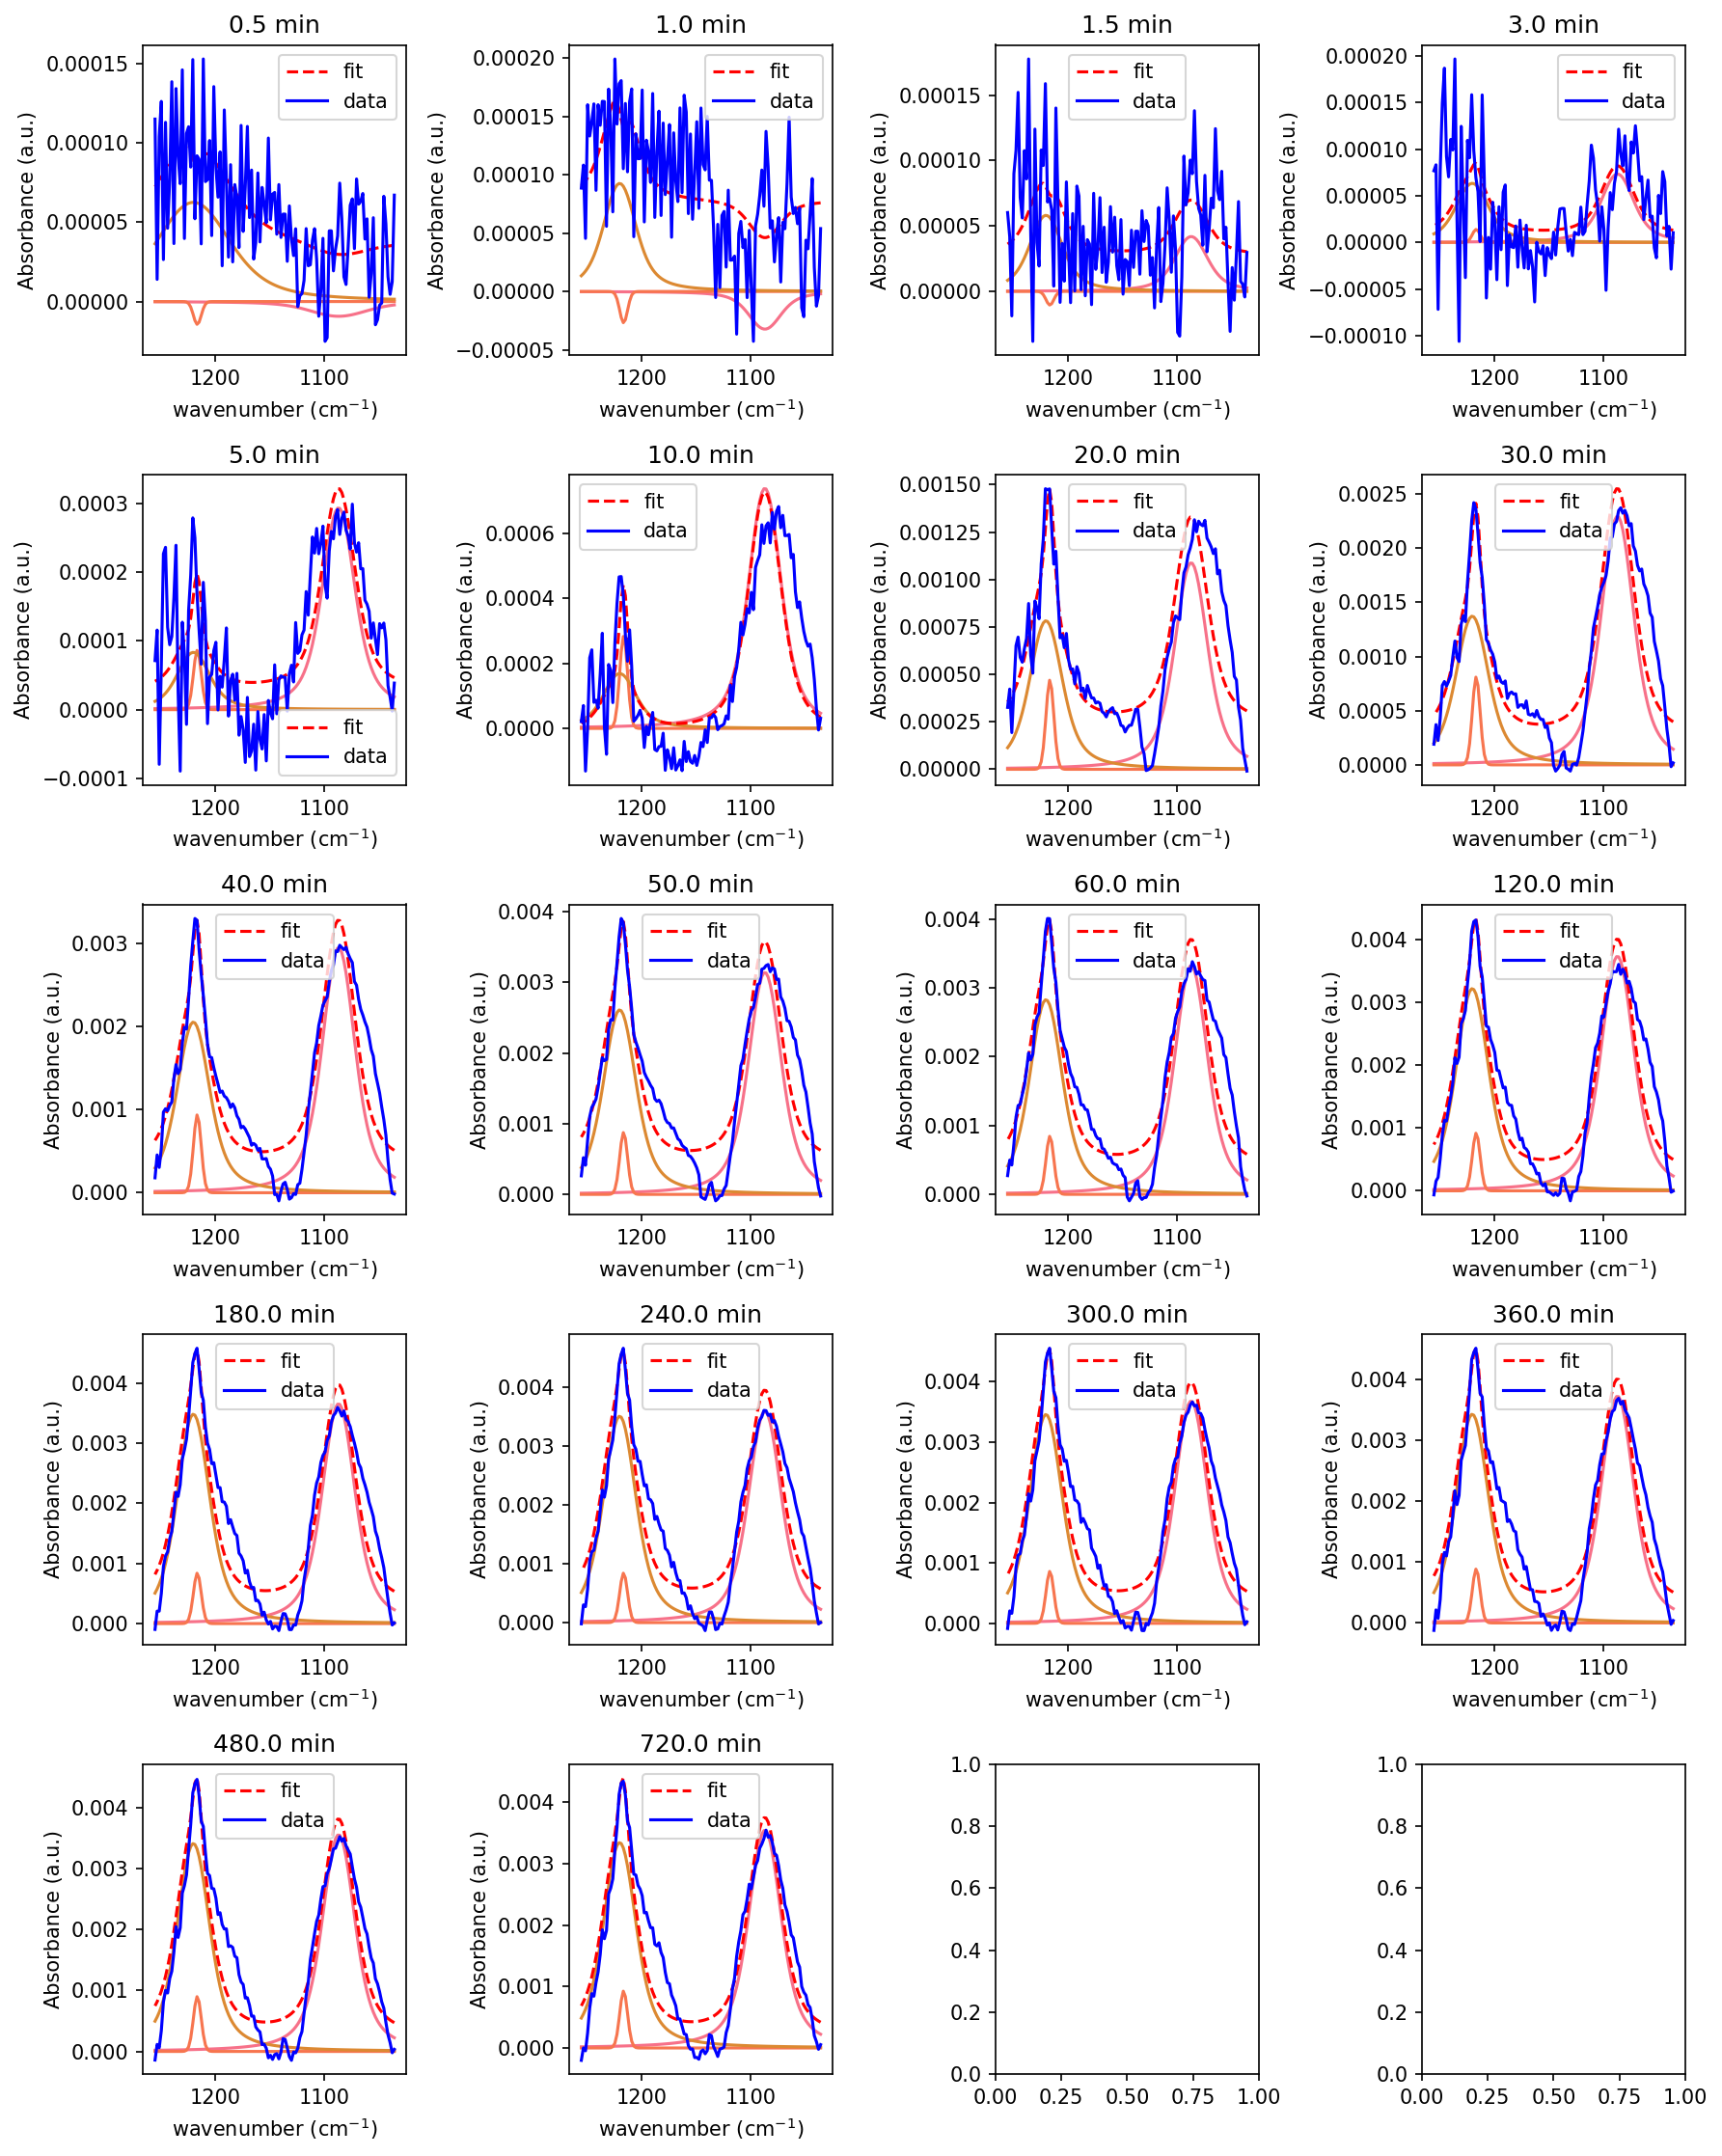

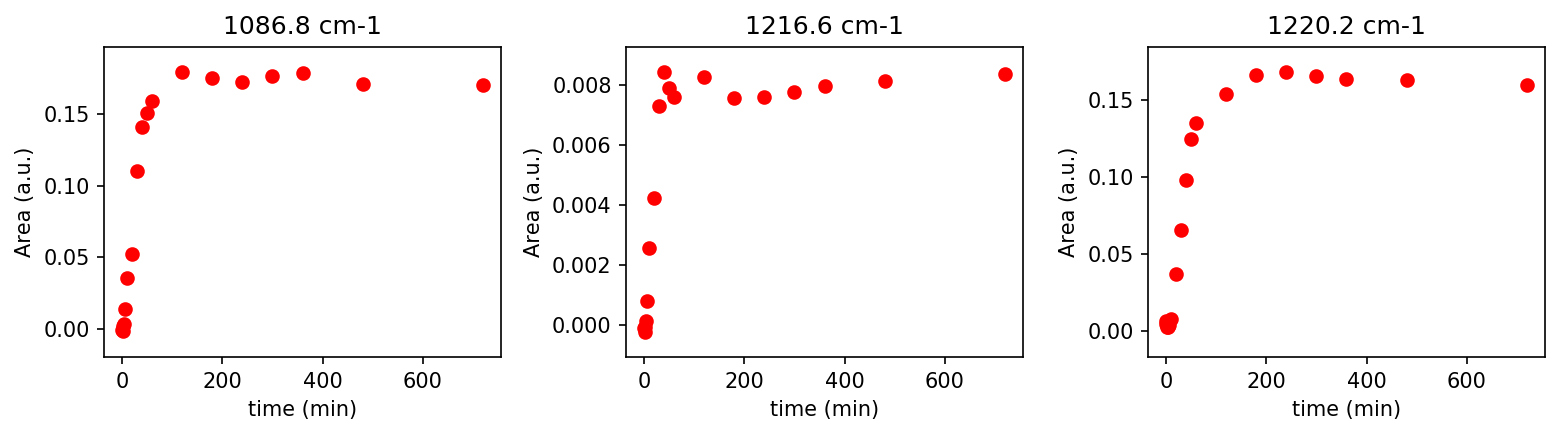

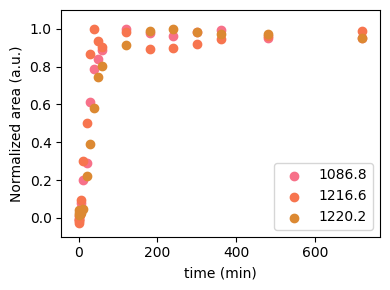

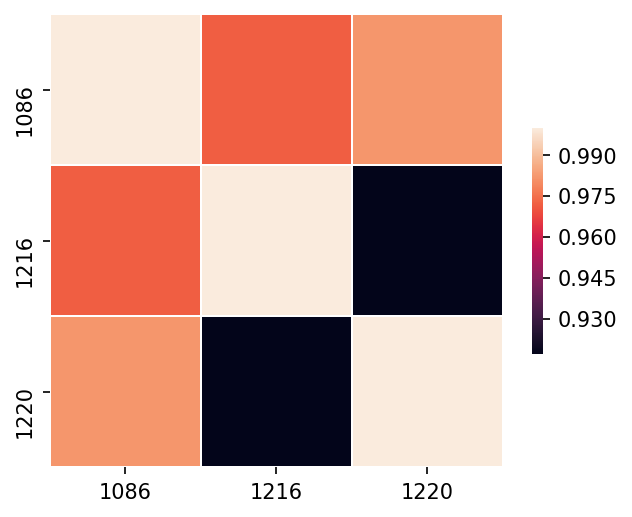

{'Peak Pos': [1086, 1216, 1220],
 'Amps': array([[-7.98162150e-04, -1.29972305e-04,  6.73116375e-03],
        [-1.54712228e-03, -2.42266645e-04,  4.43948931e-03],
        [ 2.00837493e-03, -9.42671112e-05,  2.78455379e-03],
        [ 3.51720355e-03,  1.25982891e-04,  3.03803913e-03],
        [ 1.40590739e-02,  7.79616767e-04,  3.98848649e-03],
        [ 3.54354834e-02,  2.56291441e-03,  8.08981699e-03],
        [ 5.21510694e-02,  4.24804223e-03,  3.74952670e-02],
        [ 1.09903628e-01,  7.32686744e-03,  6.57517509e-02],
        [ 1.41049770e-01,  8.45515296e-03,  9.82151949e-02],
        [ 1.50494801e-01,  7.91436173e-03,  1.25083005e-01],
        [ 1.59165962e-01,  7.62747250e-03,  1.35466149e-01],
        [ 1.78917311e-01,  8.29680077e-03,  1.54230012e-01],
        [ 1.75000049e-01,  7.57007528e-03,  1.66715319e-01],
        [ 1.72279510e-01,  7.60450121e-03,  1.68236591e-01],
        [ 1.76387688e-01,  7.77357427e-03,  1.65734013e-01],
        [ 1.78209320e-01,  7.98619861e-03,  

In [38]:
params_IG_CO = result.params
Plot_data_IG(params_IG_CO,x_CO,y_CO,Vec_IG_CO,Time,False)

In [39]:
Vec_IG_struc_CO = {'Peaks':[[0,2],[1]],'Types':[[1,1],[0]]}
Vec_fit_CO = Generate_Vec_IG(params_IG_CO,Vec_IG_struc_CO,18)
Vec_fit_CO['Vec1']['Lims'] = {'Peaks':np.array([0]),
                           'Specs':np.array([[1100],
                                             [1250],
                                             [0.1],
                                             [8.5],
                                             [0]]),
                           'Pos':np.array([True])
                          }


In [40]:
t0 = time.time()
fit_params_CO = Generate_params(x_CO,Vec_fit_CO,ndata = 18)

fitter = Minimizer(loss_func, fit_params_CO, fcn_args=(x_CO, y_CO, Vec_fit_CO))
result = fitter.minimize(method='leastsq')
t1 = time.time()

print('The time cost is:',t1-t0)

0 17.936344300565096 2.9363443005650964 32.936344300565096
0 1086.8 1056.8 1116.8
0 22.4780120599425 7.4780120599425 37.4780120599425
0 1220.2 1190.2 1250.2
1 3.6 0.1 6.5
1 1216.5887094546447 1211.5887094546447 1221.5887094546447
The time cost is: 22.5748872756958


The R2 score of the fit is: 0.95
Plotting.....


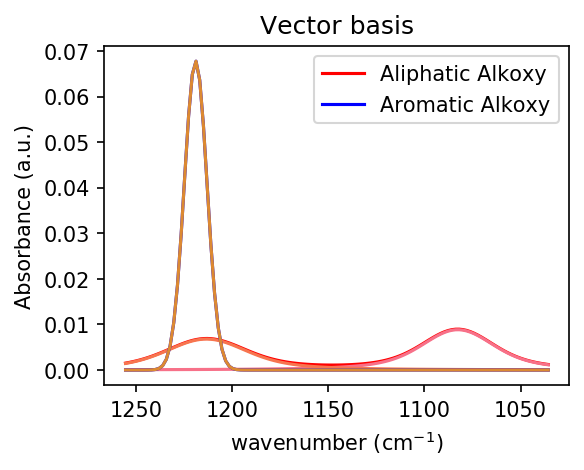

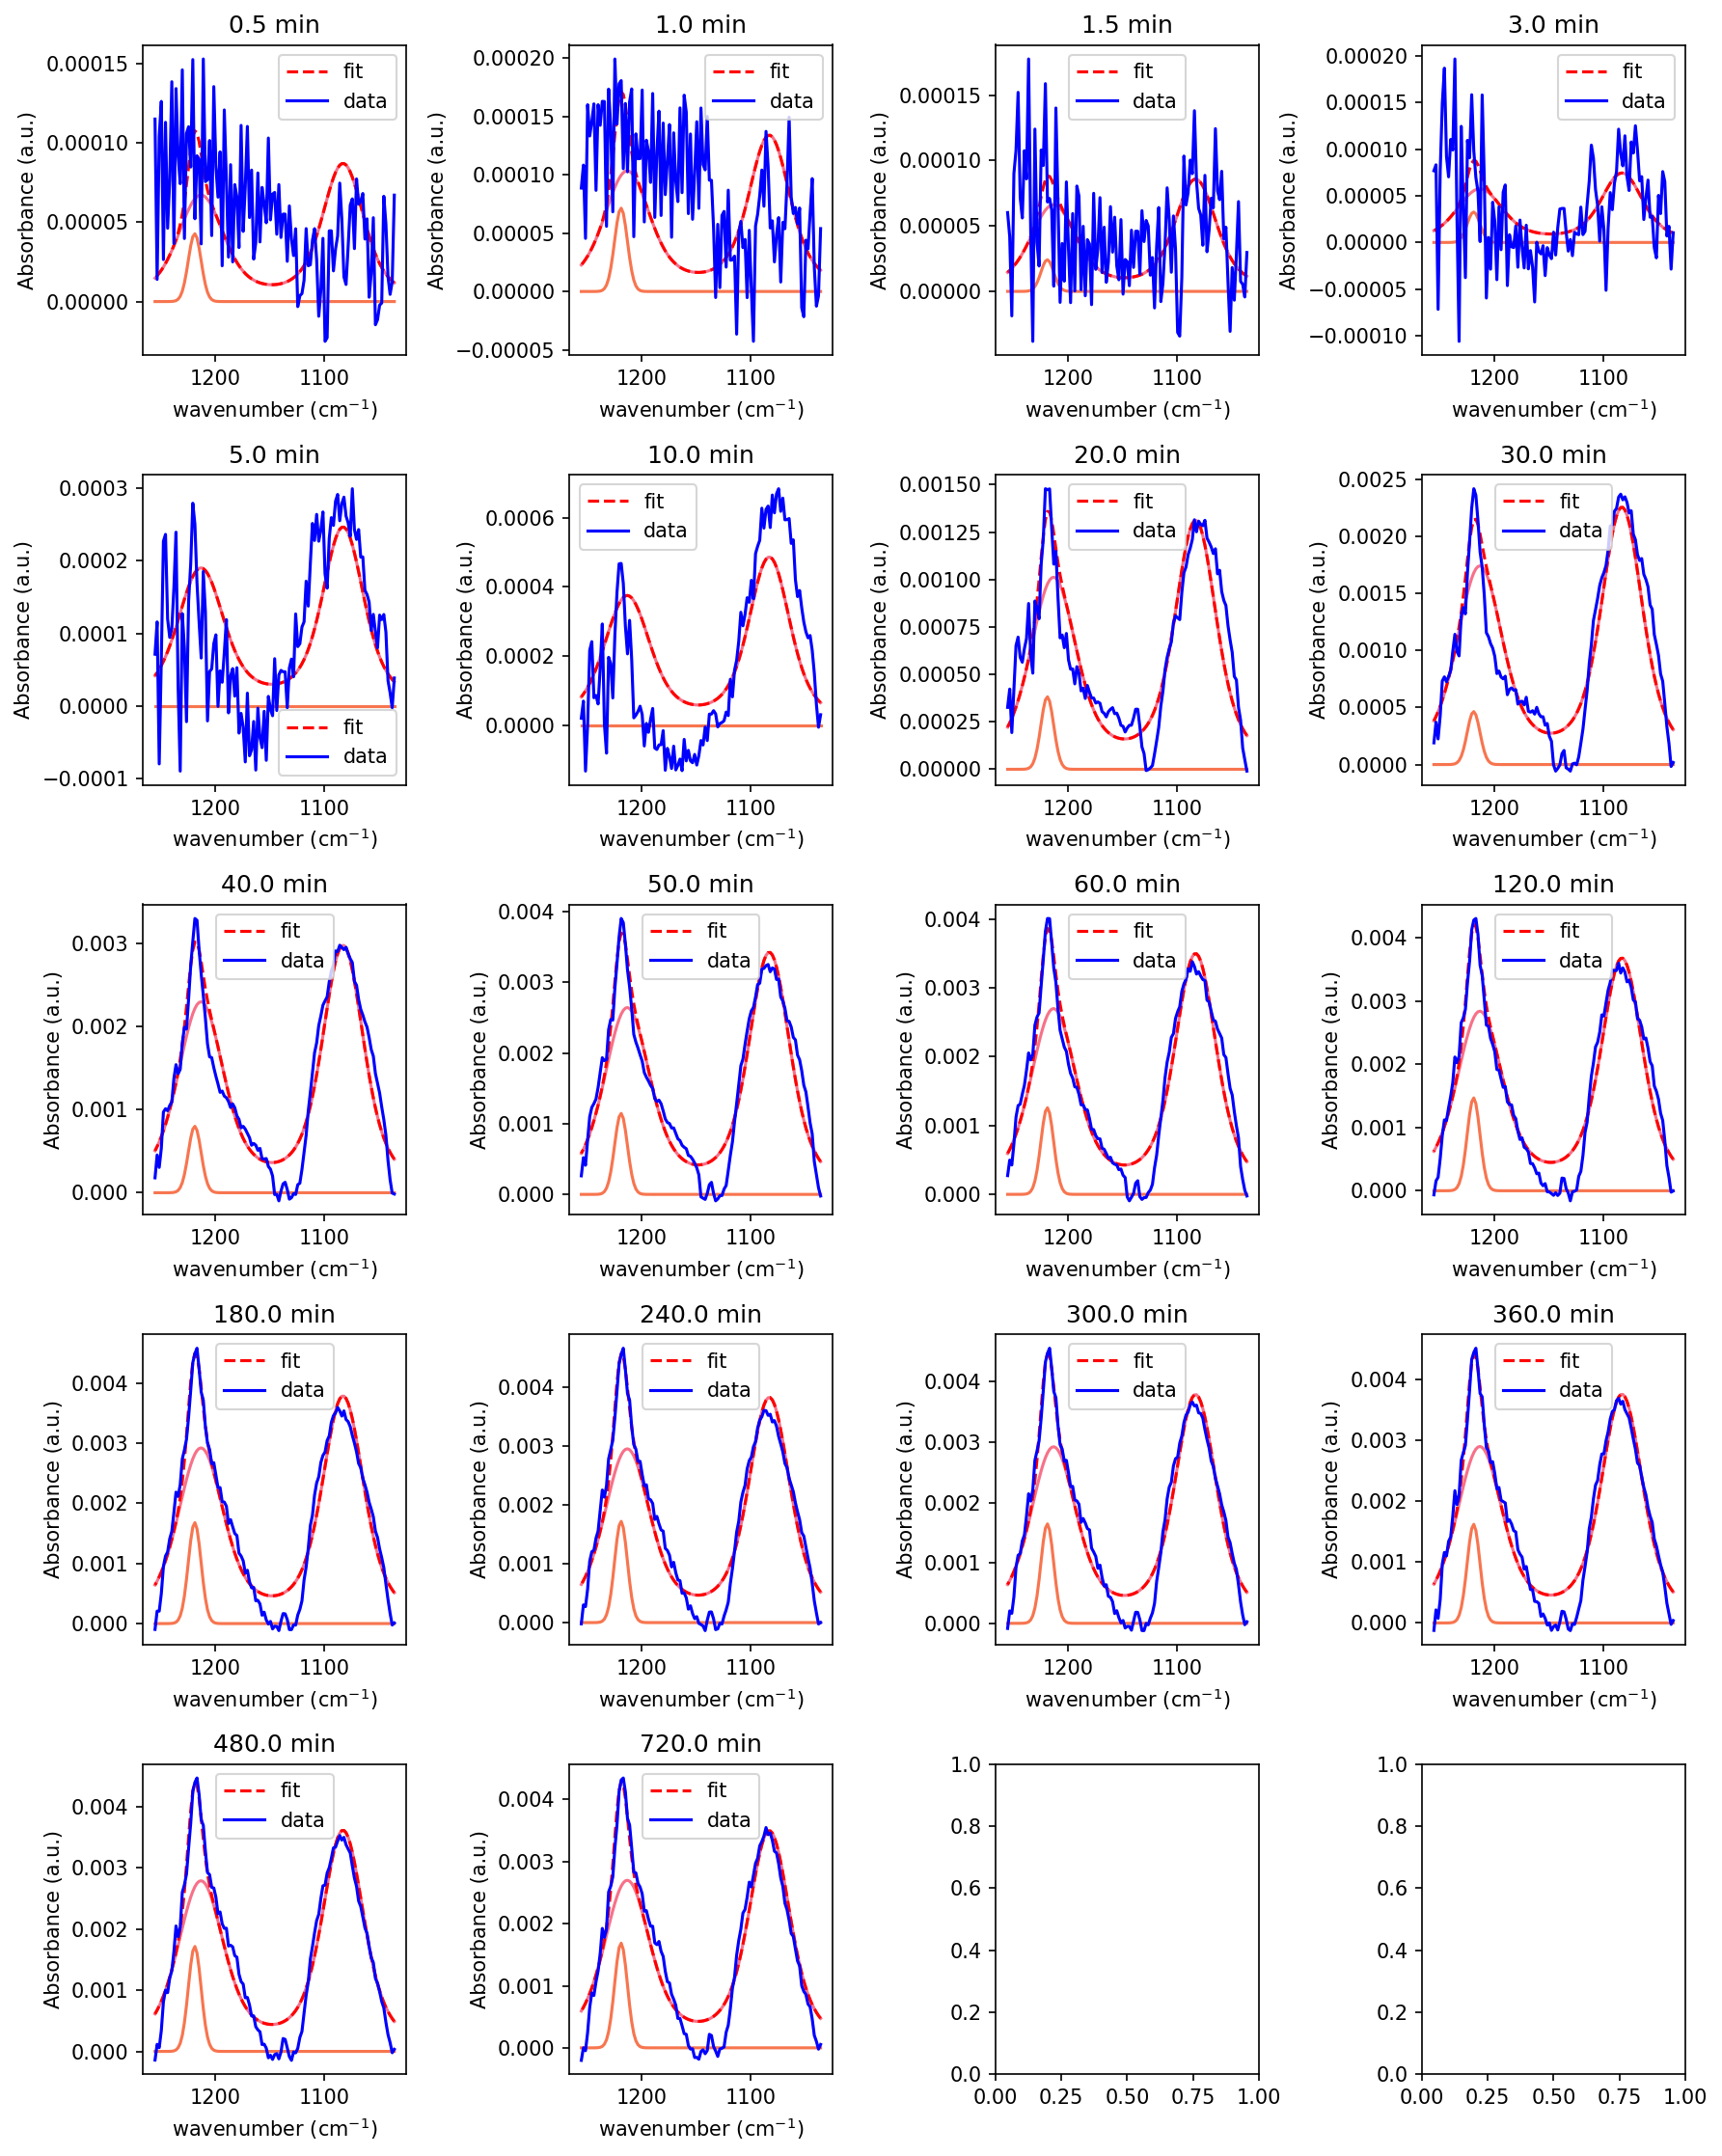

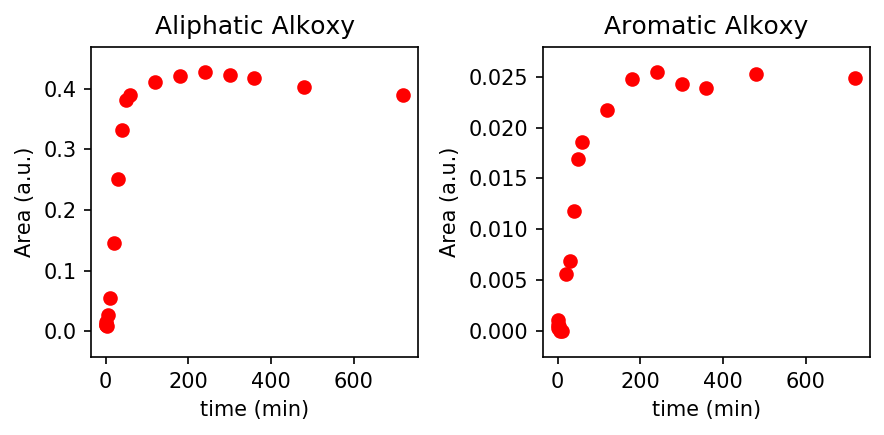

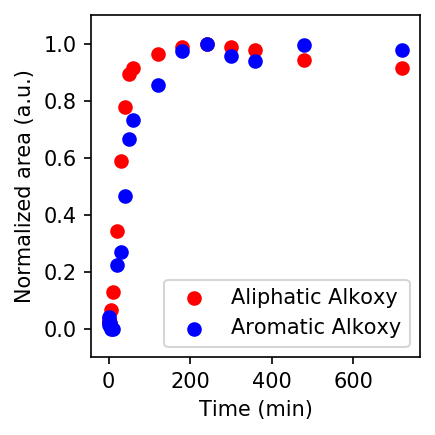

In [41]:
new_params_CO = result.params
Vec_name_CO = ['Aliphatic Alkoxy','Aromatic Alkoxy']
yhat_CO = Generate_data(new_params_CO,x_CO,Vec_fit_CO,ndata=18)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CO.flatten(), yhat_CO.flatten())))
Plot_data(new_params_CO,x_CO,y_CO,Vec_fit_CO,Time,Vec_name_CO,False)

In [42]:
Print_var(new_params_CO,np.array(['Aliphatic Alkoxy','Aromatic Alkoxy']),Vec_IG_struc_CO)

Species		Type		Peak (cm-1)	Variance (cm-1)	
Aliphatic Alkoxy	Voigt		1082.7		12.7
		Voigt		1213.4		14.2
Aromatic Alkoxy	Gaussian	1219.0		5.9
